# Automata

Watch https://www.youtube.com/watch?v=_eC14GonZnU

## Lookup Table

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C = np.zeros((100,100)).astype(int)

In [3]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

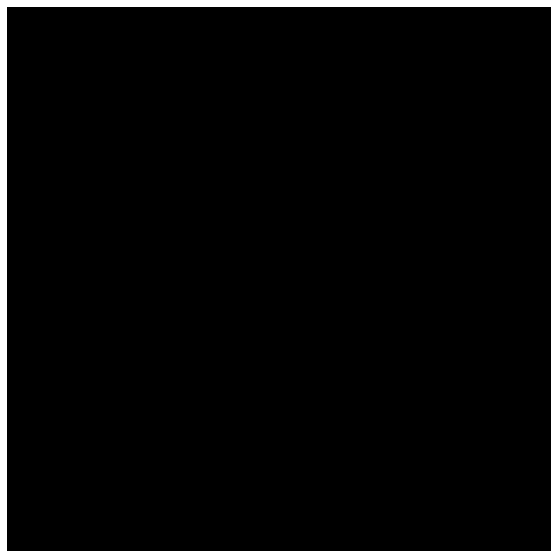

In [4]:
plot(C)

In [5]:
C[0,50] = 1 

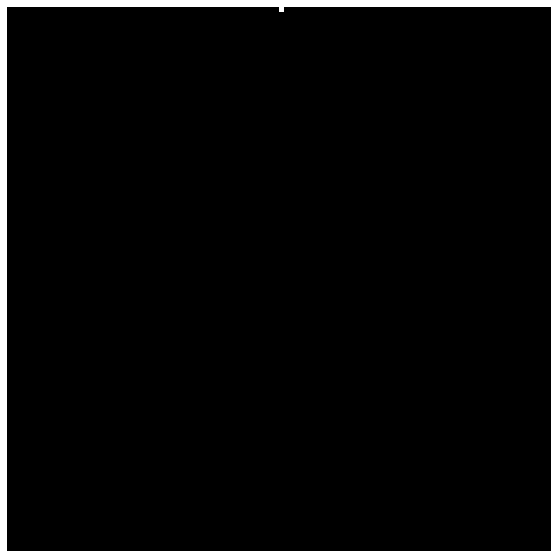

In [6]:
plot(C)

<img src = 'https://mathworld.wolfram.com/images/eps-gif/ElementaryCARule090_1000.gif'>

In [7]:
bin(90)

'0b1011010'

In [8]:
rule = np.zeros((2,2,2))

In [9]:
rule[0,0,0] = 0
rule[0,0,1] = 1
rule[0,1,0] = 0
rule[0,1,1] = 1
rule[1,0,0] = 1
rule[1,0,1] = 0
rule[1,1,0] = 1
rule[1,1,1] = 0

In [10]:
def CA(X):

    for i in range(1,X.shape[0]-1): #row
        for j in range(1,X.shape[1]-1): #col

            N  = X[i-1,j]
            NW = X[i-1,j-1]
            NE = X[i-1,j+1]

            X[i,j] = rule[NW,N,NE]

    return X

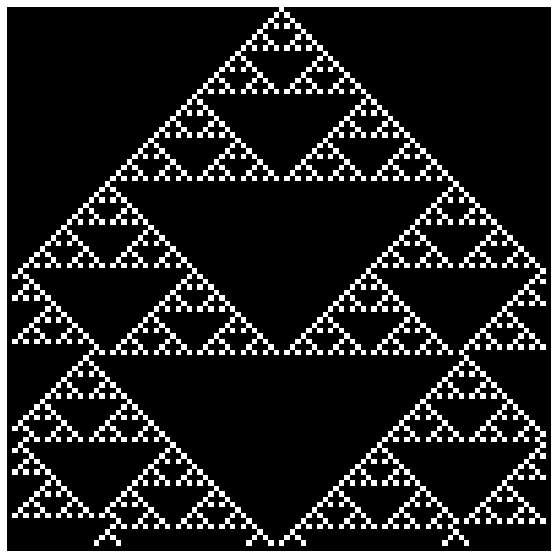

In [11]:
plot(CA(C))

## Direct Formula 

In [12]:
def CA(X):

    for i in range(1,X.shape[0]-1): #row
        for j in range(1,X.shape[1]-1): #col

            X[i,j] = (rule/(2**(4*X[i-1,j-1] + 2*X[i-1,j] + X[i-1,j+1]))) % 2

    return X

In [13]:
rule = 90

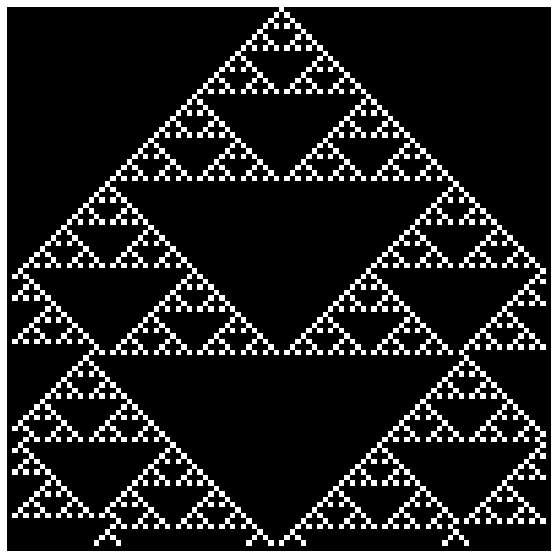

In [14]:
plot(CA(C))

In [15]:
import time
import numpy as np
from numpy.fft import fft2, ifft2
from matplotlib import animation
import matplotlib.pyplot as plt

In [16]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [17]:
shape = (100, 100)
density = 0.5

In [18]:
board = np.random.uniform(0, 1, shape) < density

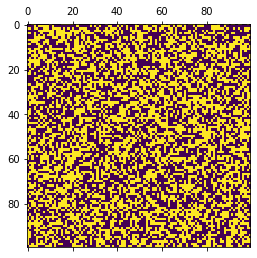

In [19]:
plt.matshow(board)

In [20]:
#Conway
neighborhood = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
rule = [[2, 3], [3]]

In [21]:
n_height, n_width = neighborhood.shape
kernal = np.zeros(shape)
kernal[(shape[0] - n_height - 1) // 2 : (shape[0] + n_height) // 2, (shape[1] - n_width - 1) // 2 : (shape[1] + n_width) // 2] = neighborhood

In [22]:
def fft_convolve2d(board, kernal):
    board_ft = fft2(board)
    kernal_ft = fft2(kernal)
    height, width = board_ft.shape
    convolution = np.real(ifft2(board_ft * kernal_ft))
    convolution = np.roll(convolution, - int(height / 2) + 1, axis=0)
    convolution = np.roll(convolution, - int(width / 2) + 1, axis=1)
    return convolution.round()

In [23]:
def update(board, kernal):
    convolution = fft_convolve2d(board, kernal)
    new_board = np.zeros(convolution.shape)
    new_board[np.where(np.in1d(convolution, rule[0]).reshape(shape) & (board == 1))] = 1
    new_board[np.where(np.in1d(convolution, rule[1]).reshape(shape) & (board == 0))] = 1
    return new_board

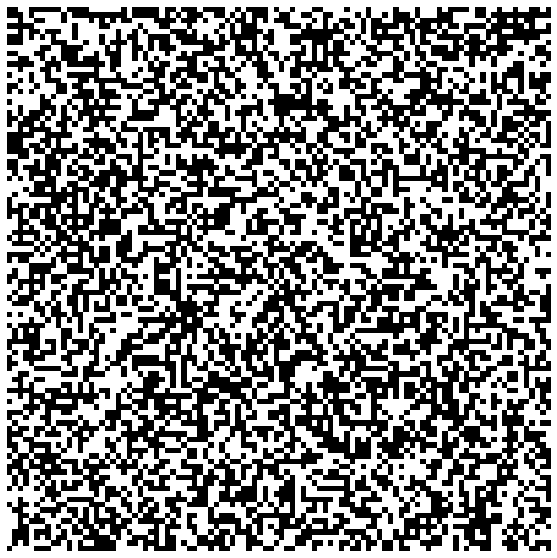

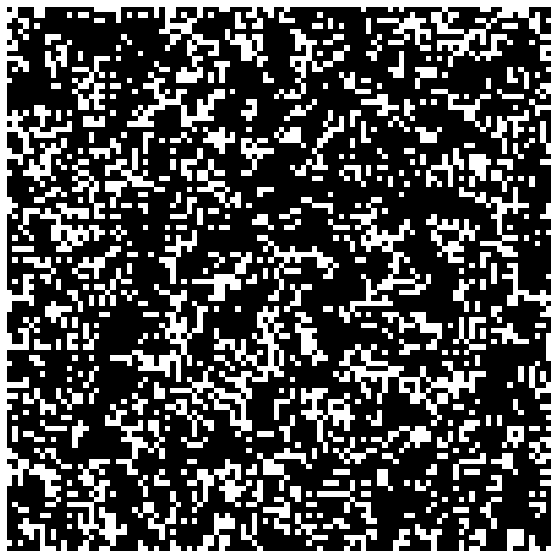

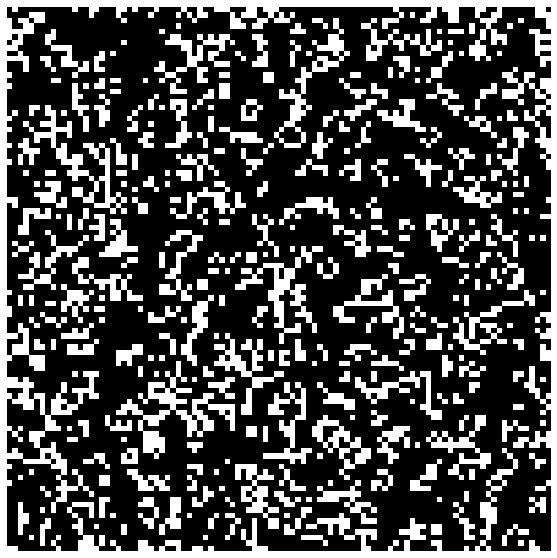

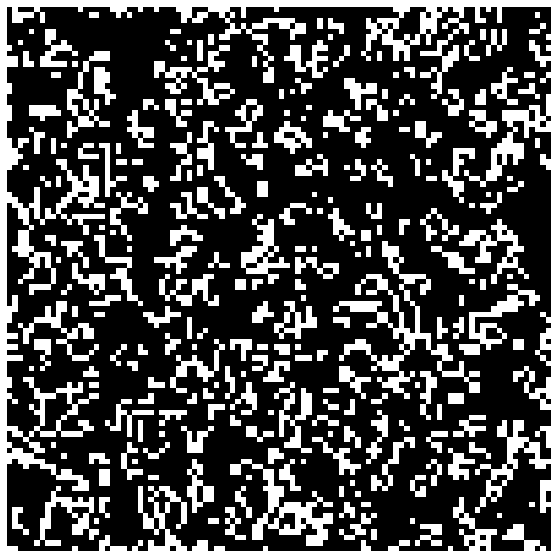

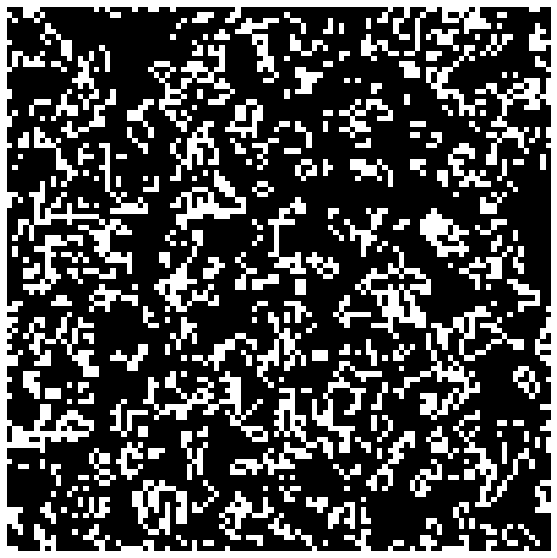

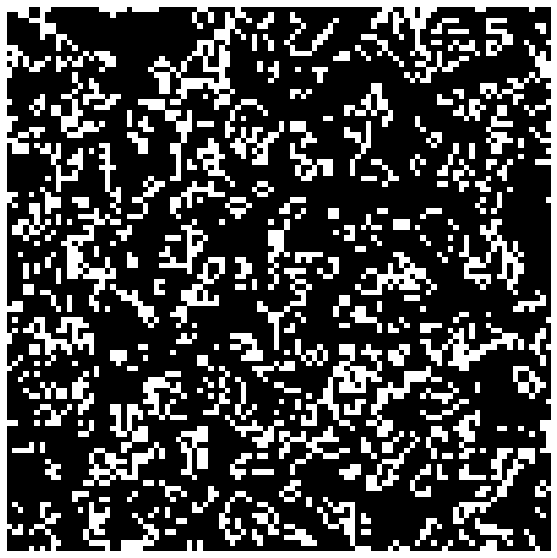

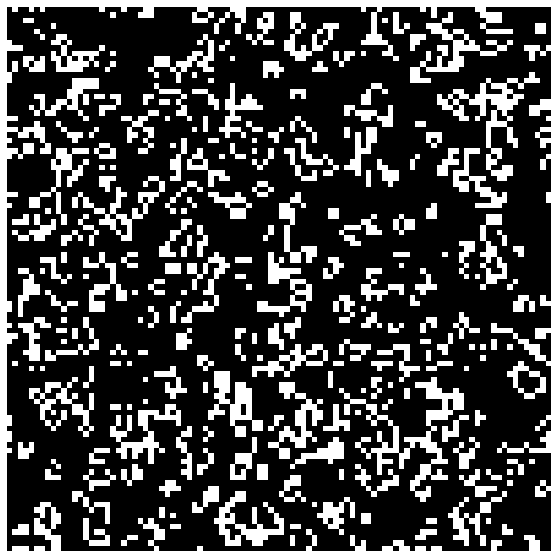

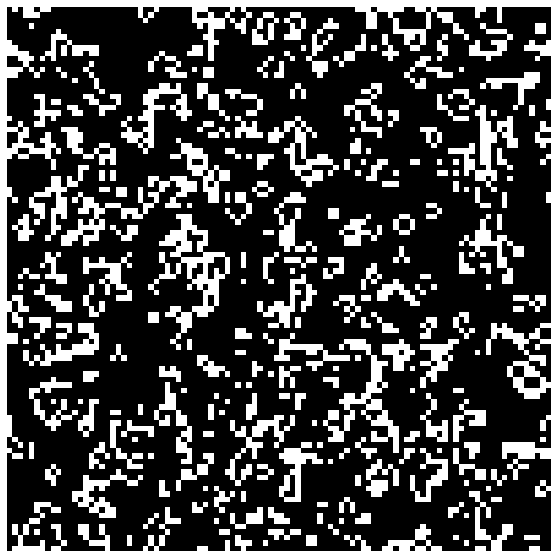

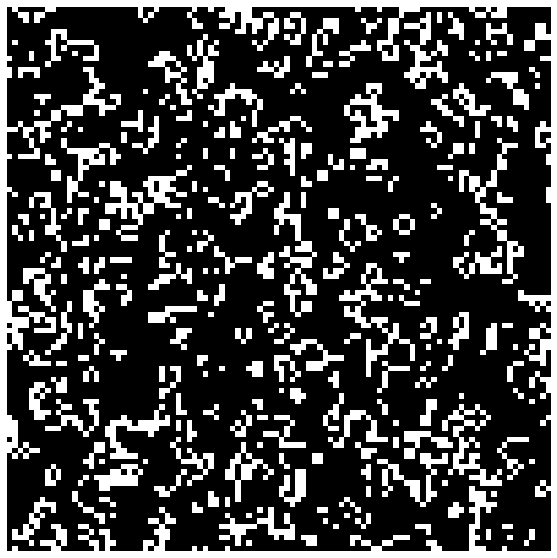

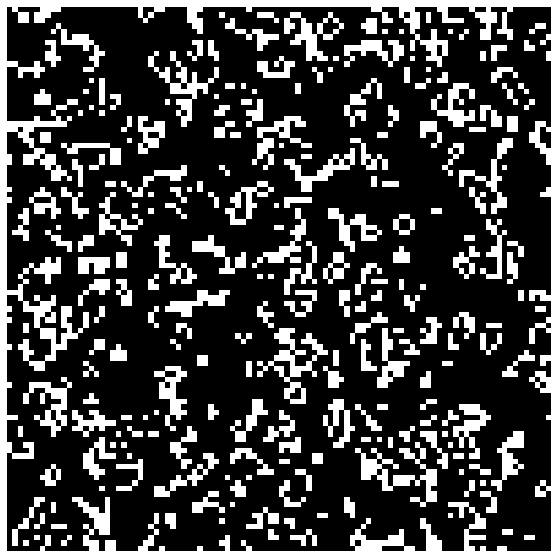

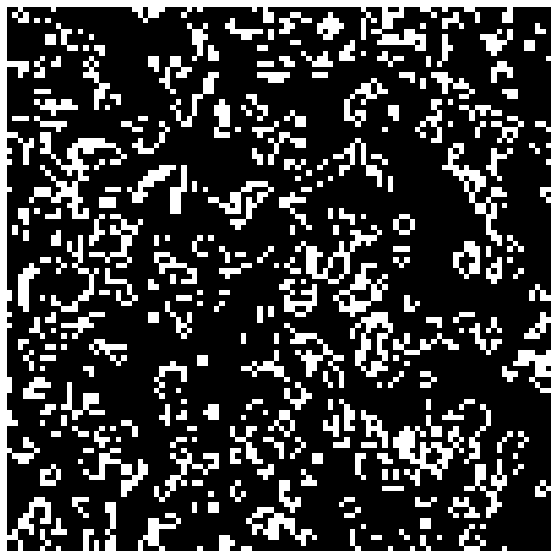

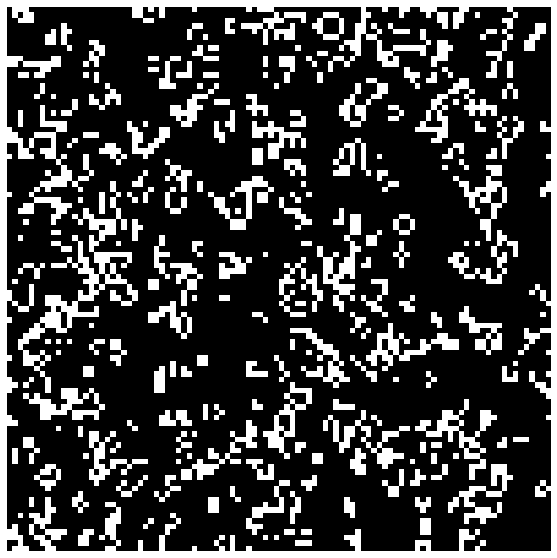

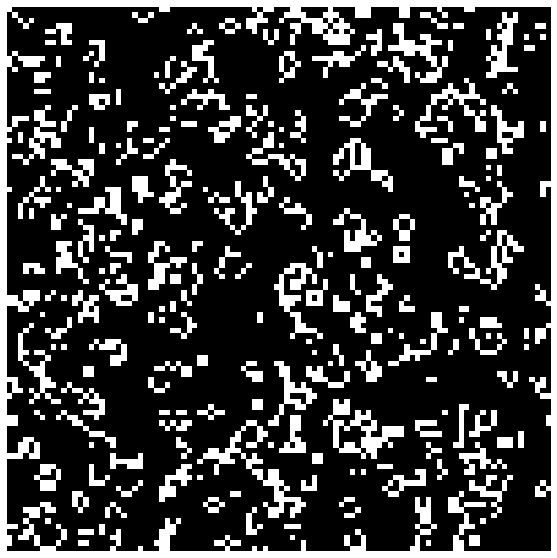

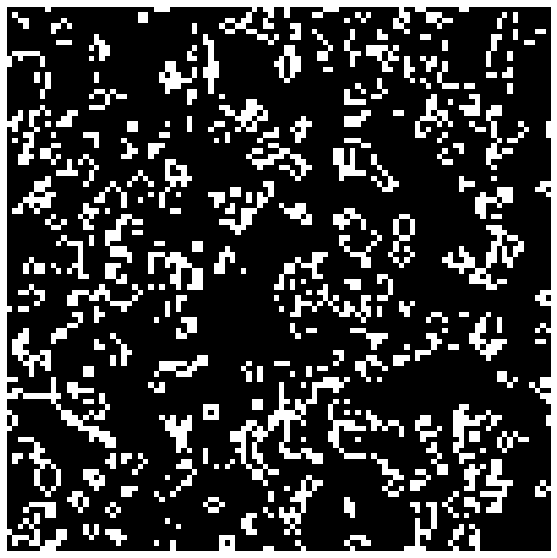

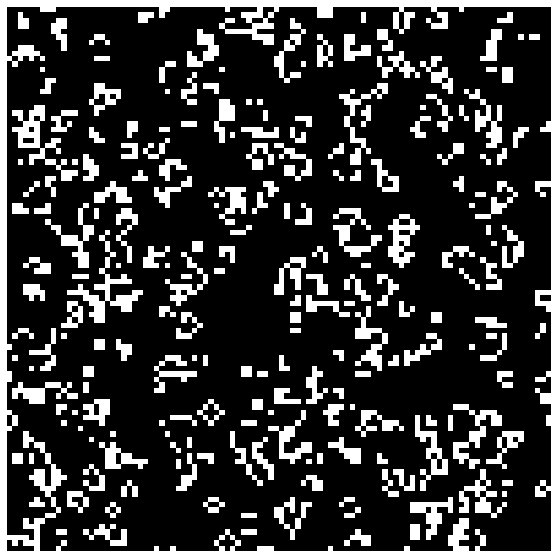

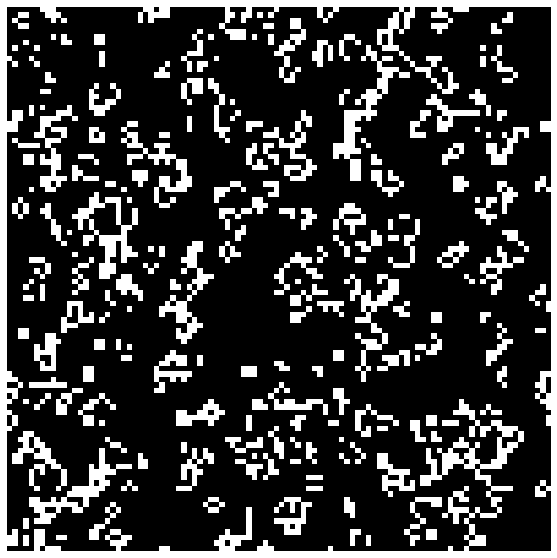

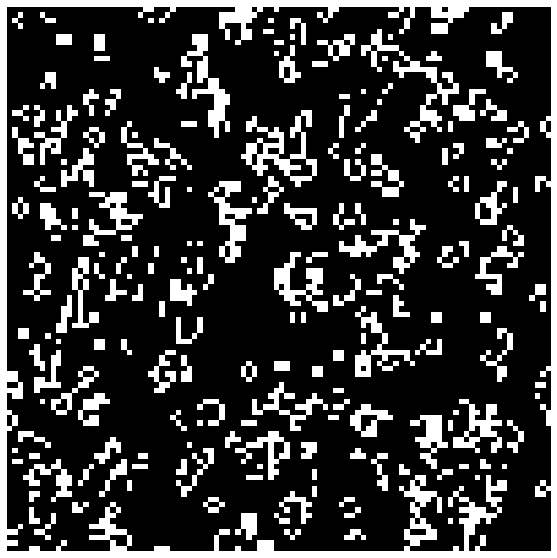

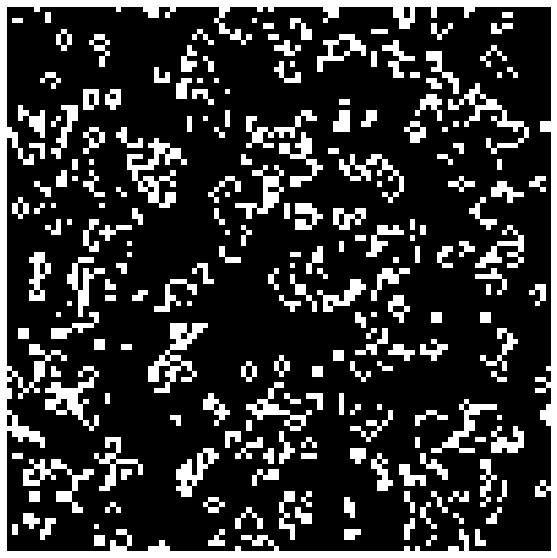

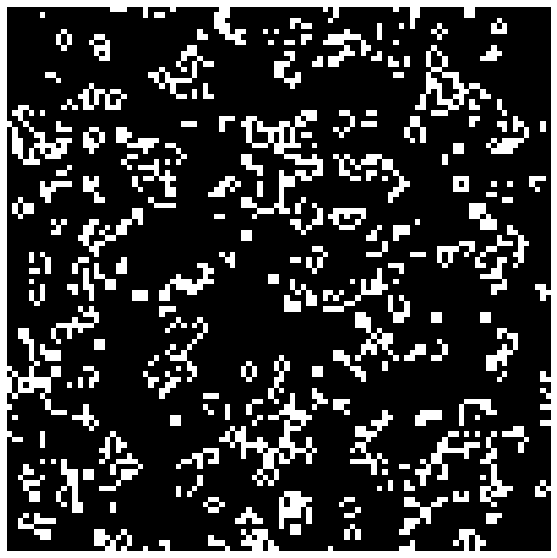

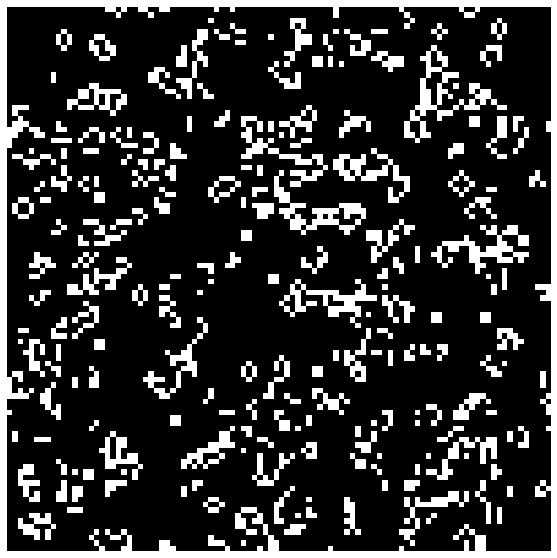

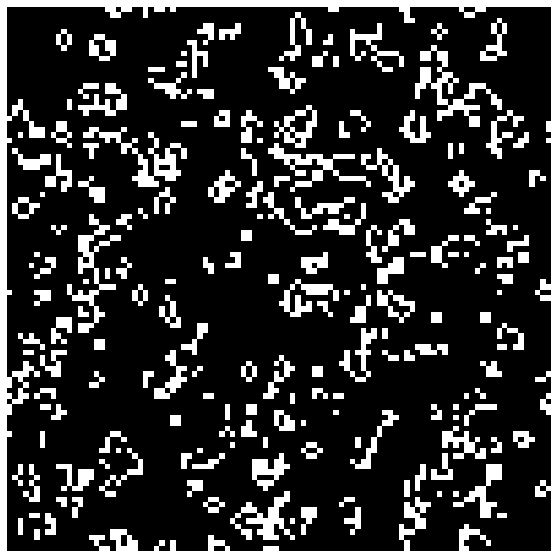

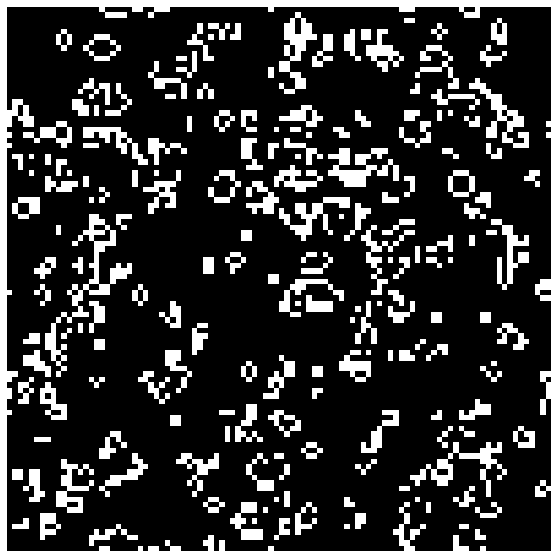

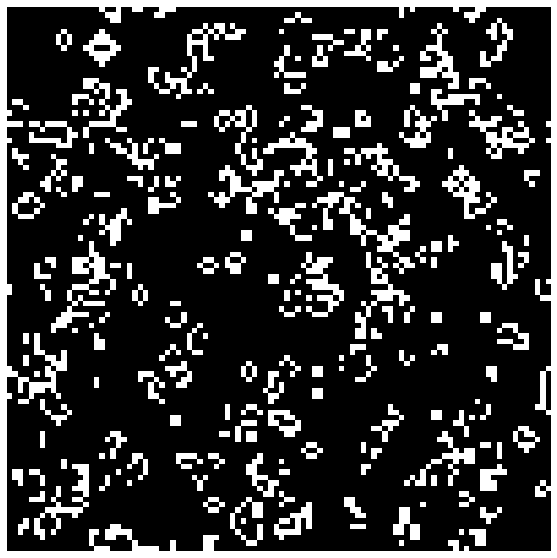

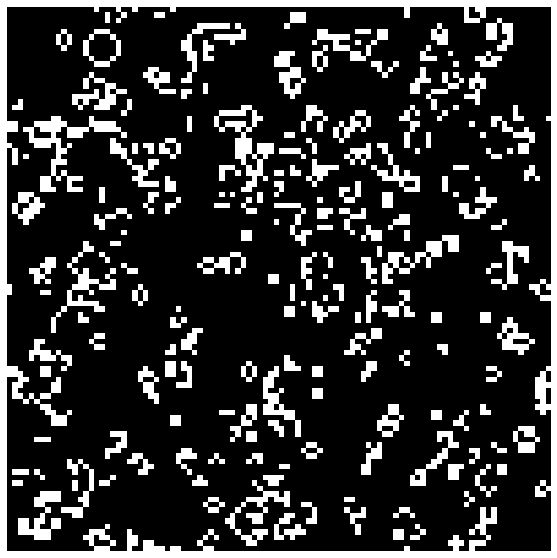

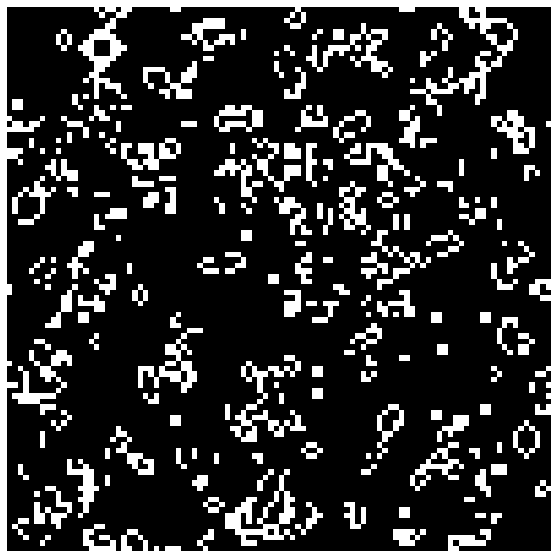

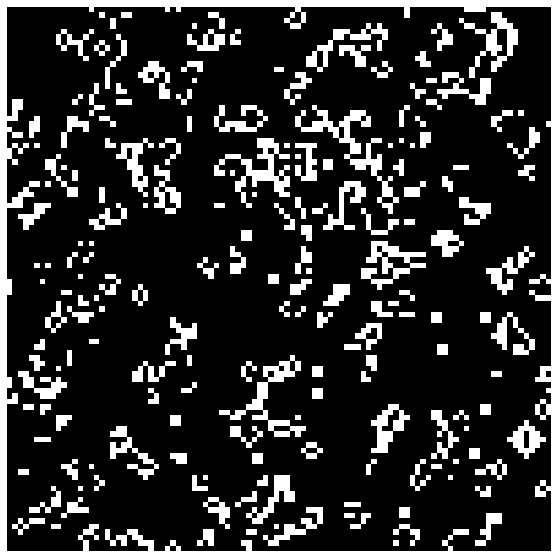

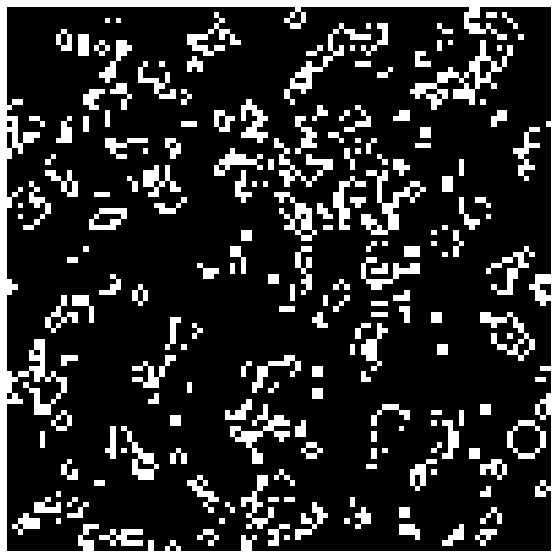

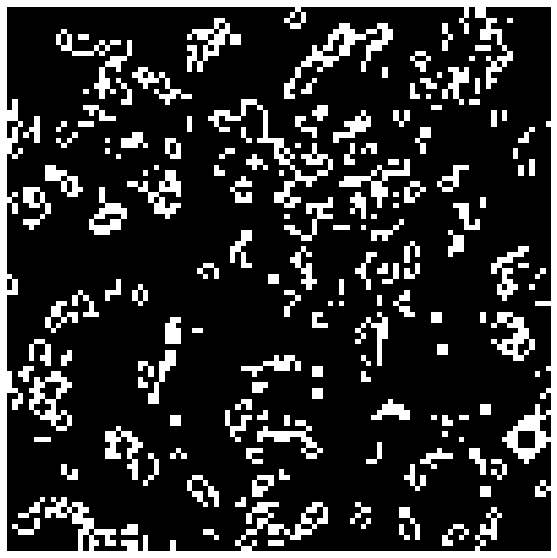

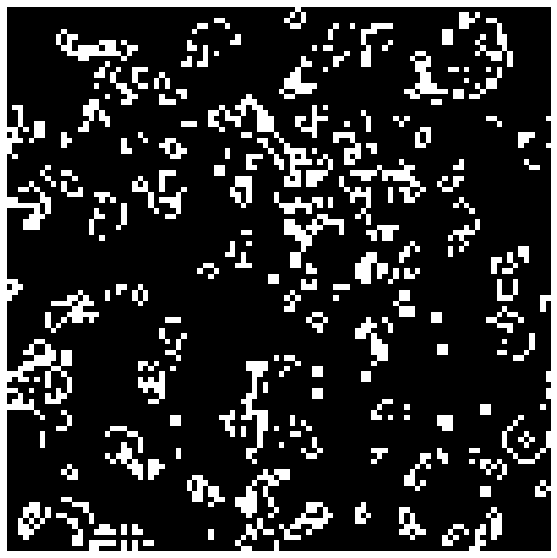

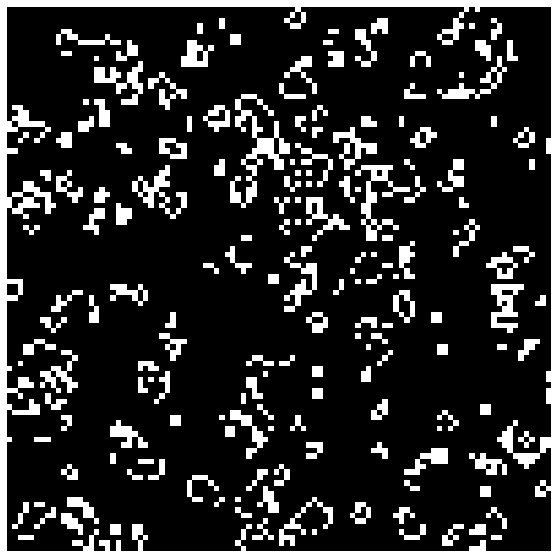

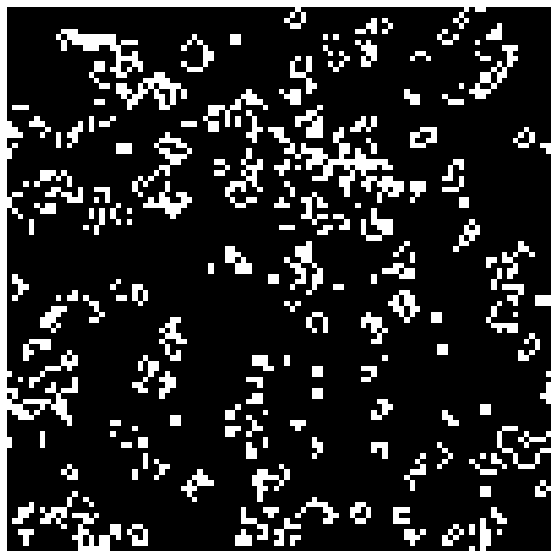

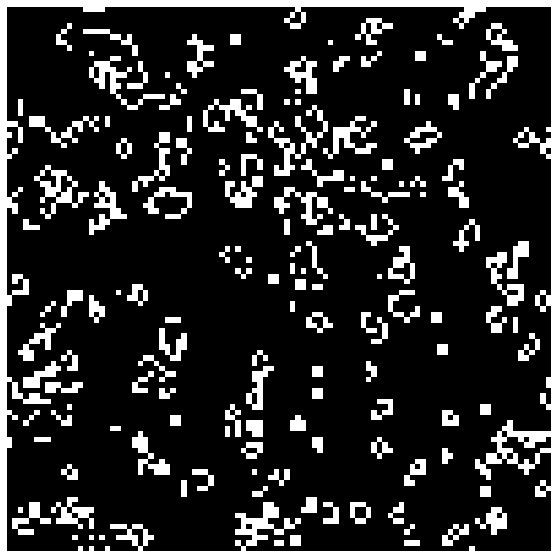

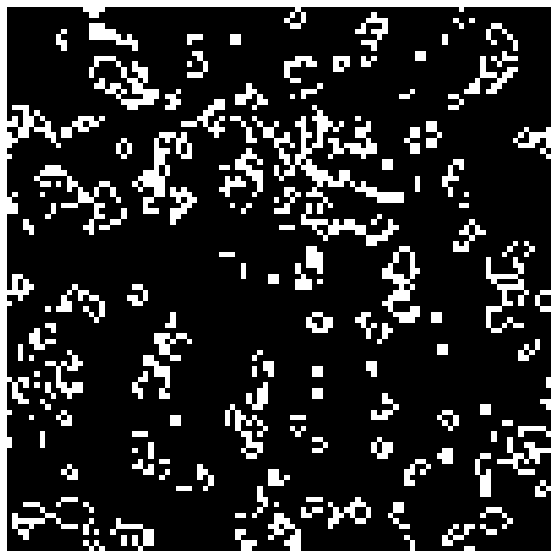

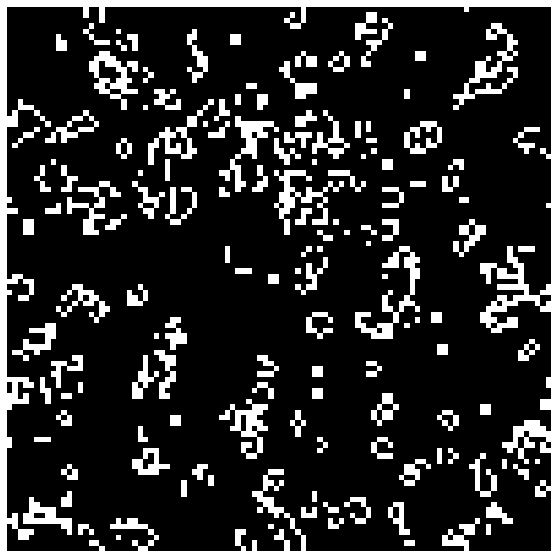

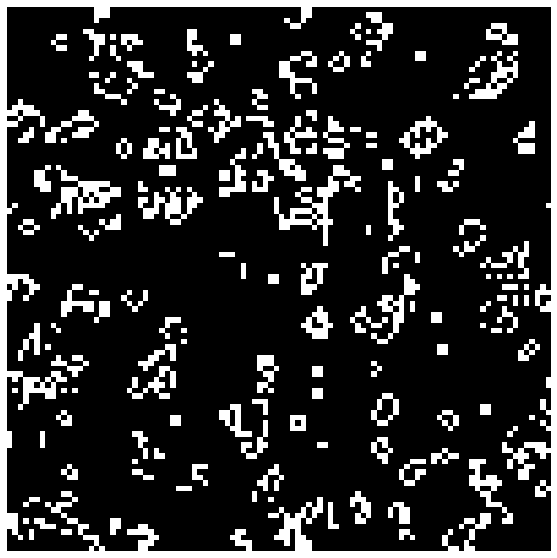

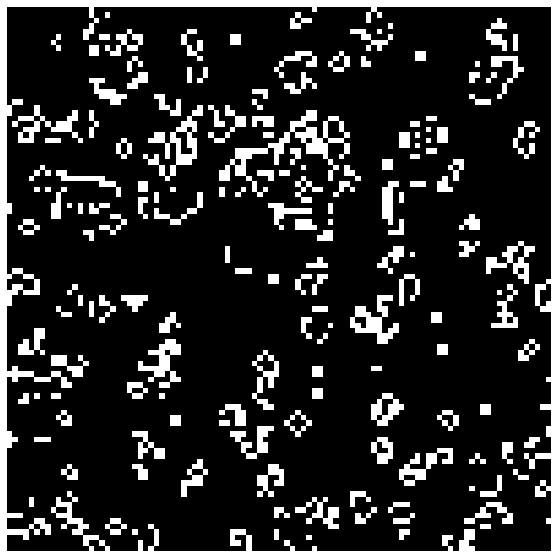

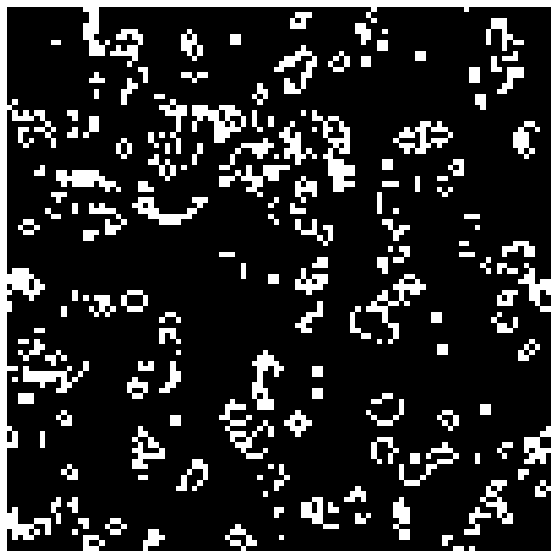

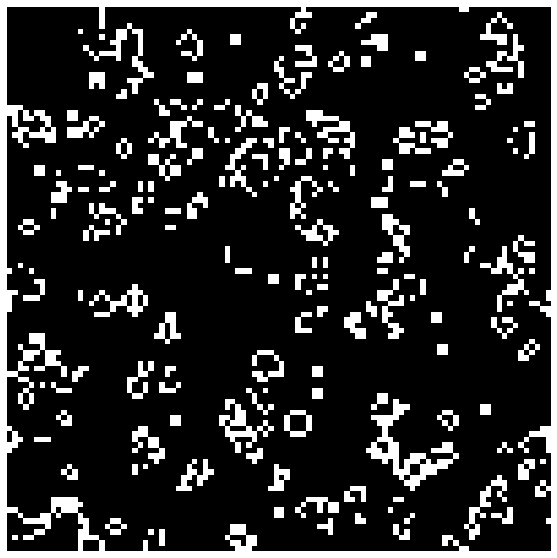

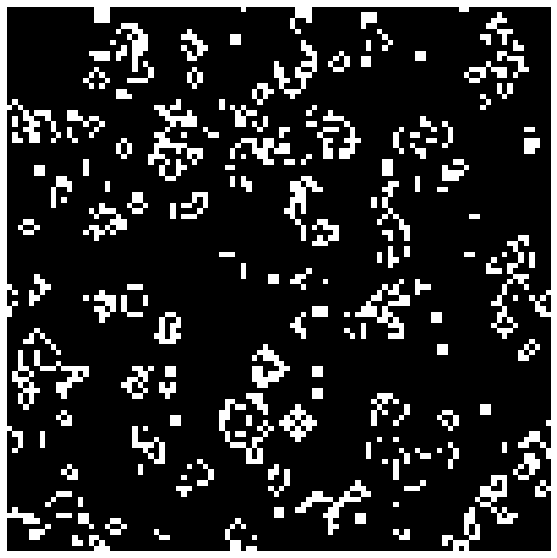

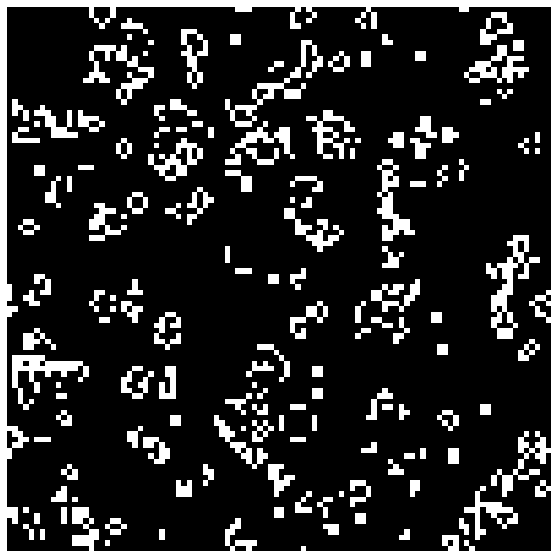

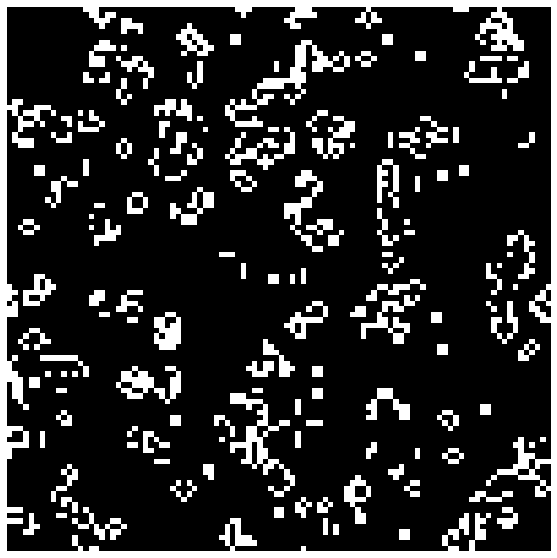

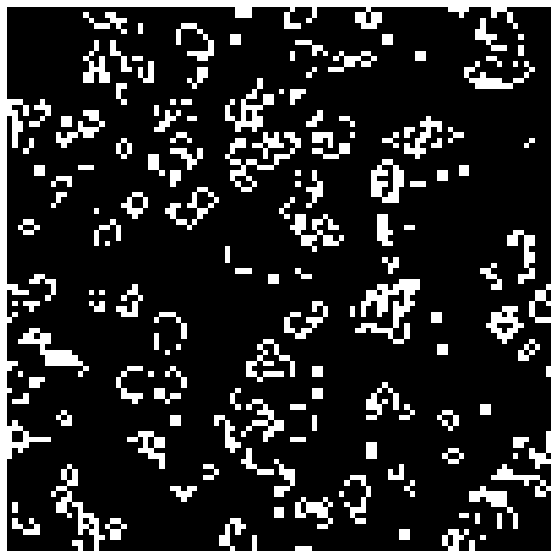

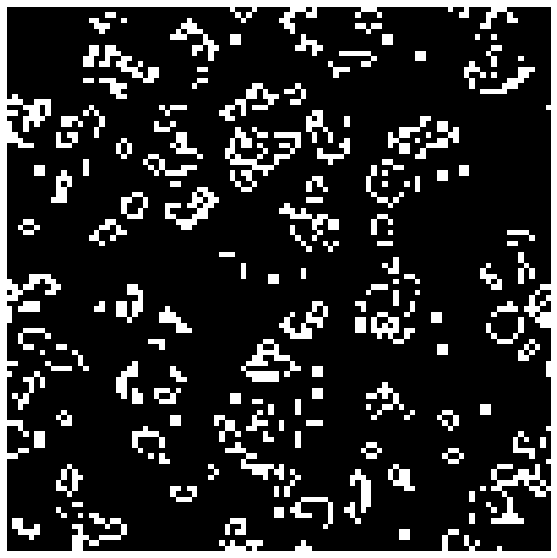

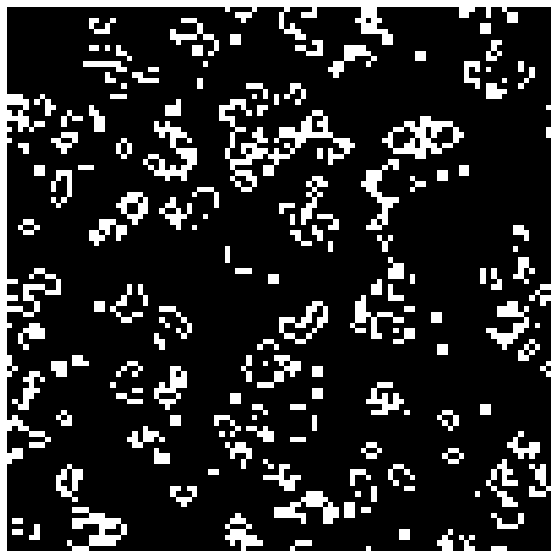

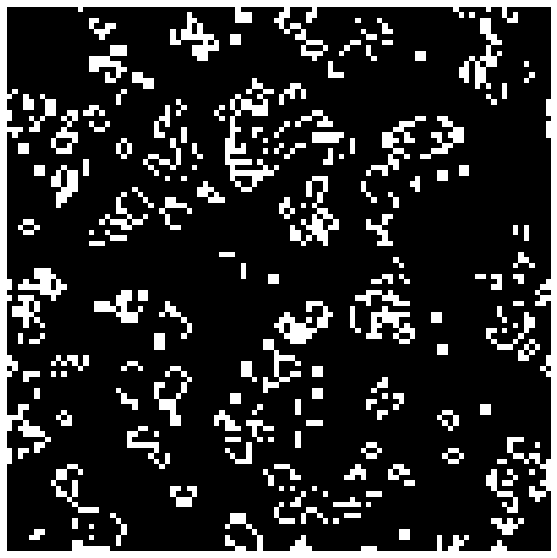

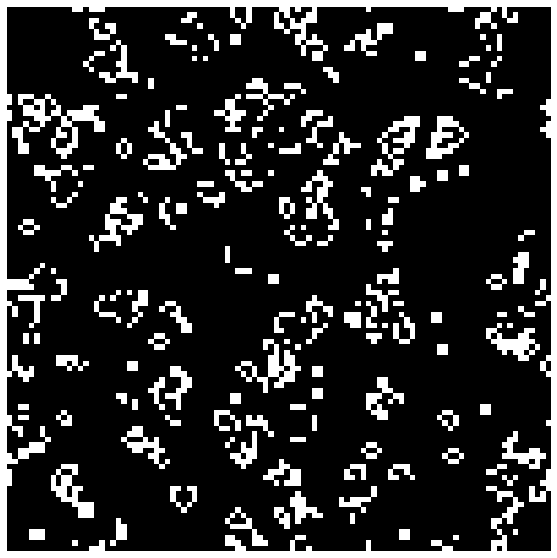

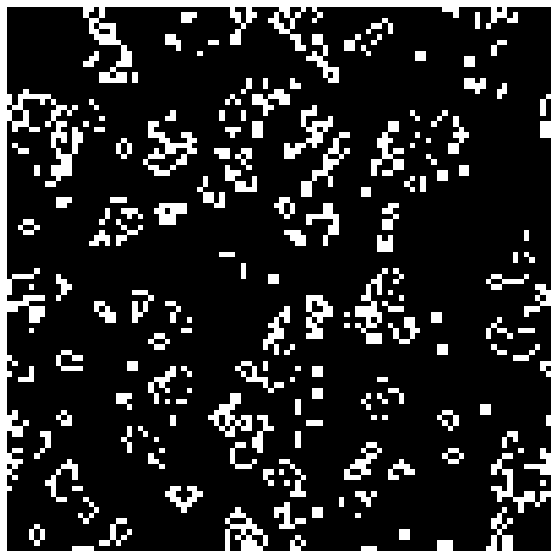

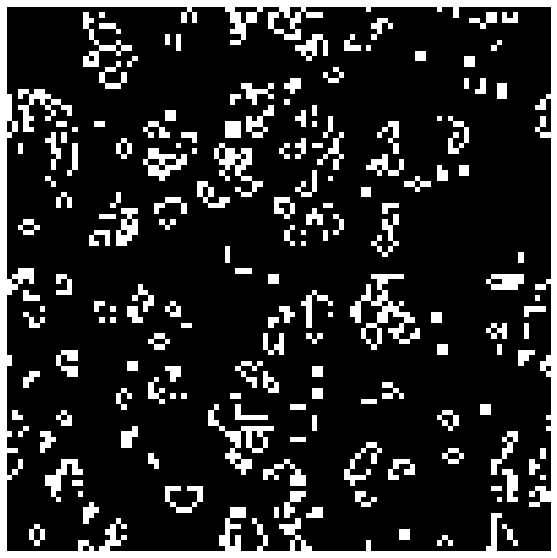

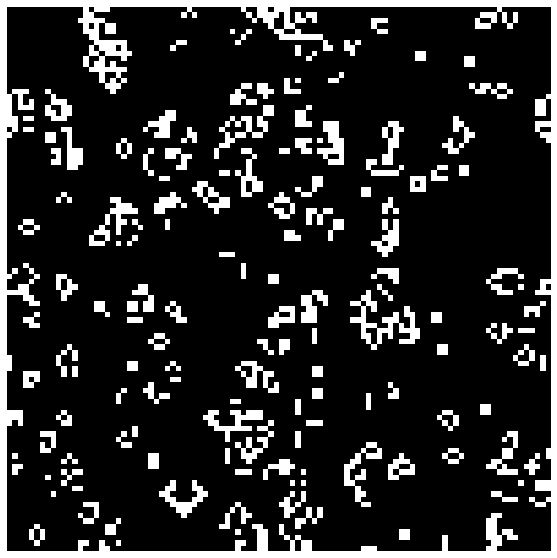

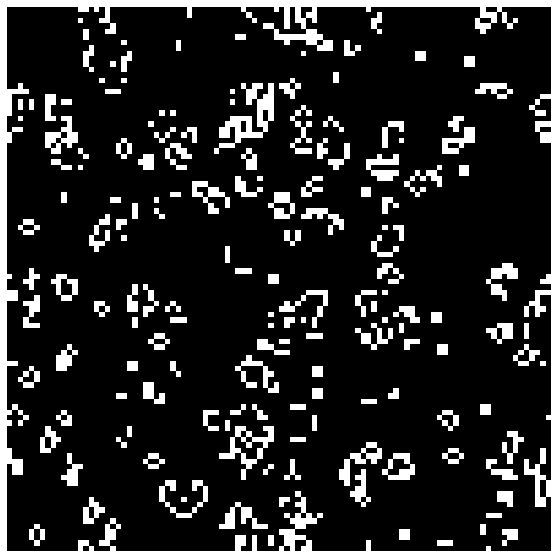

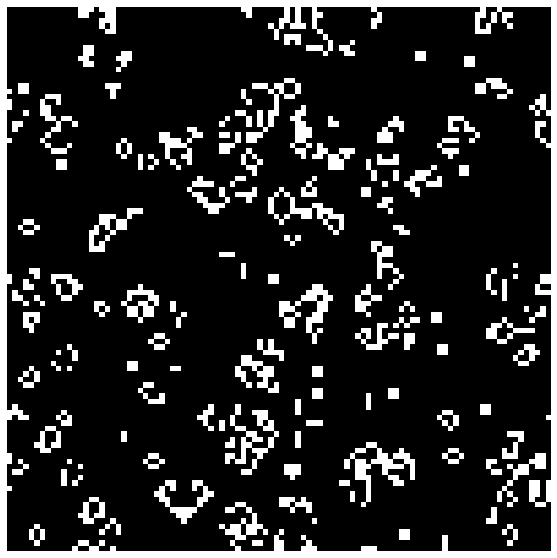

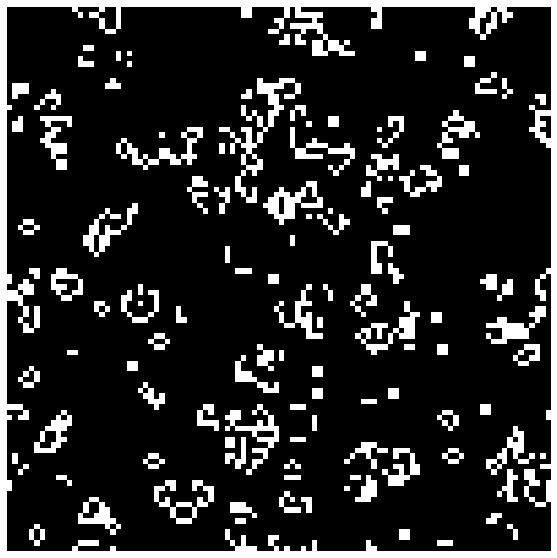

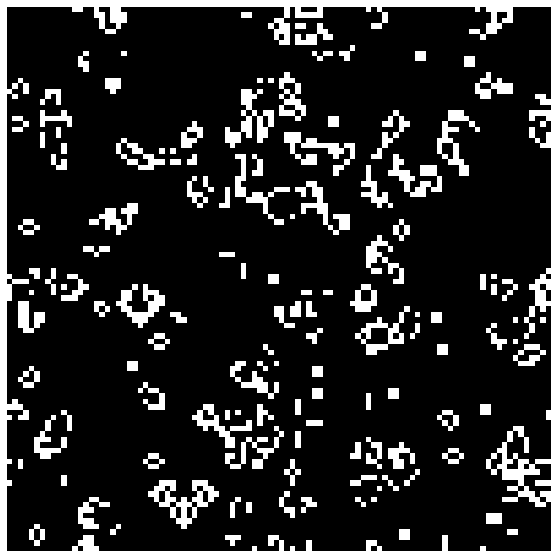

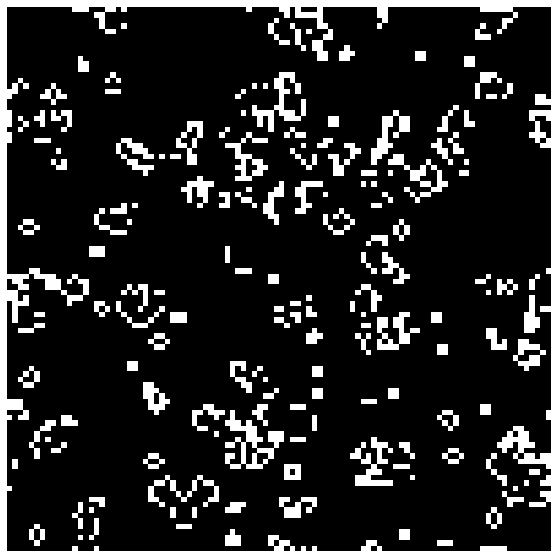

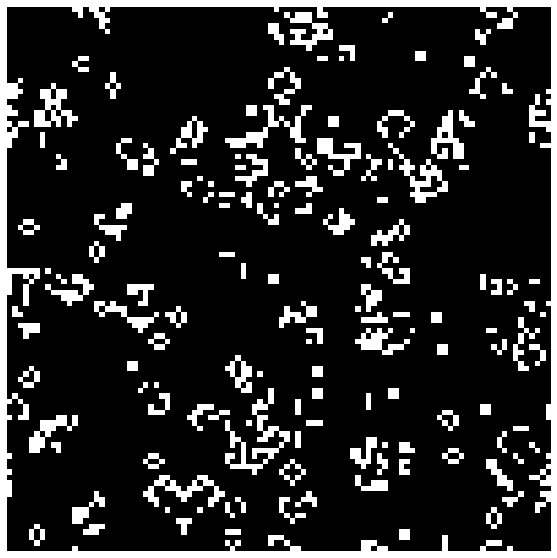

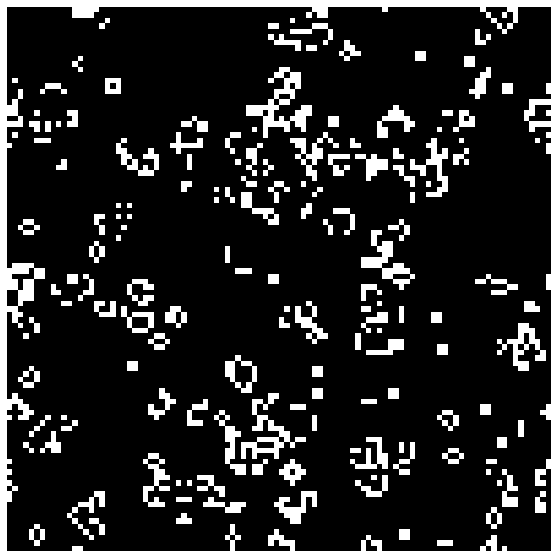

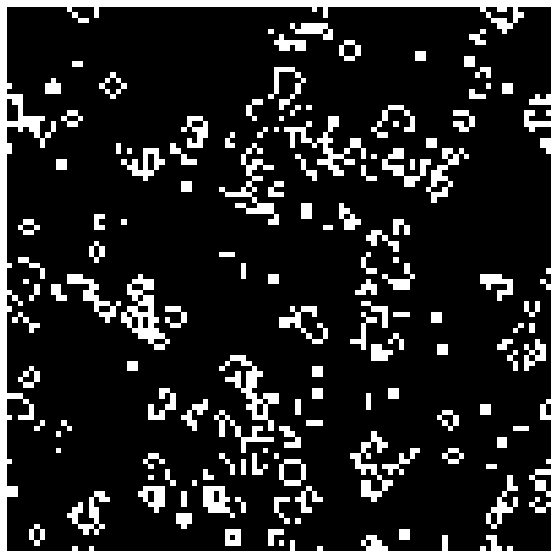

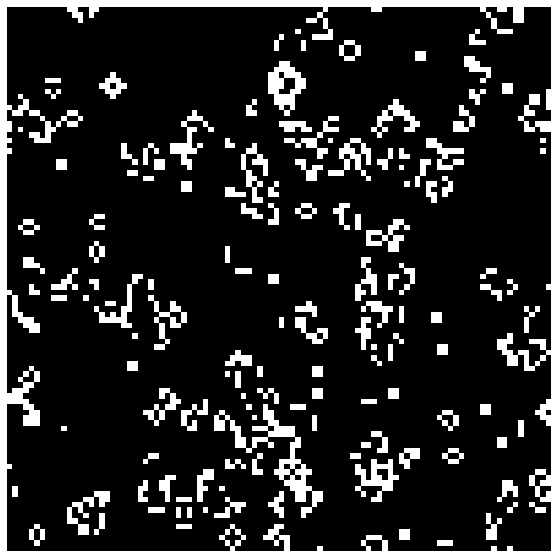

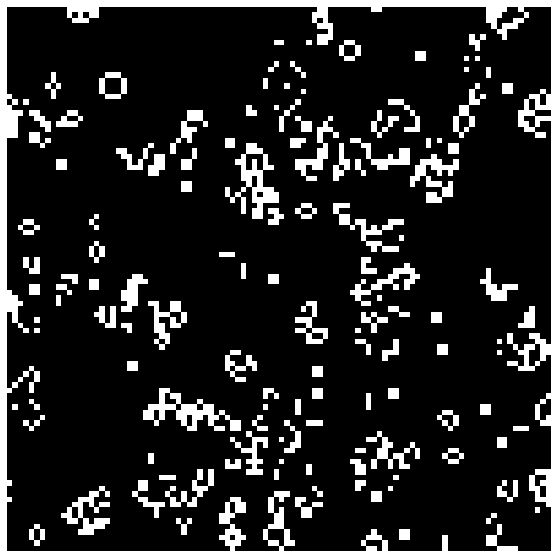

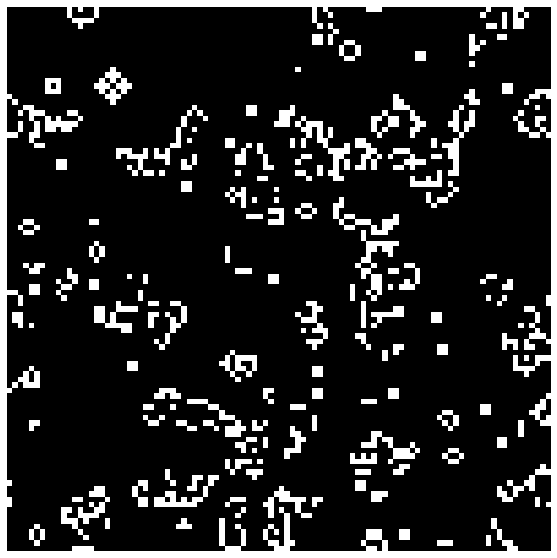

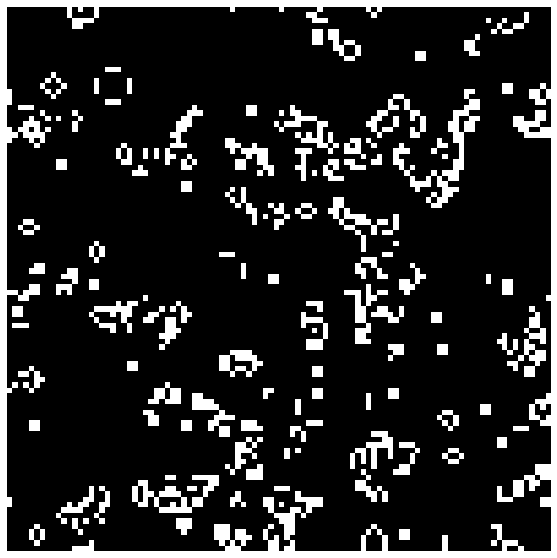

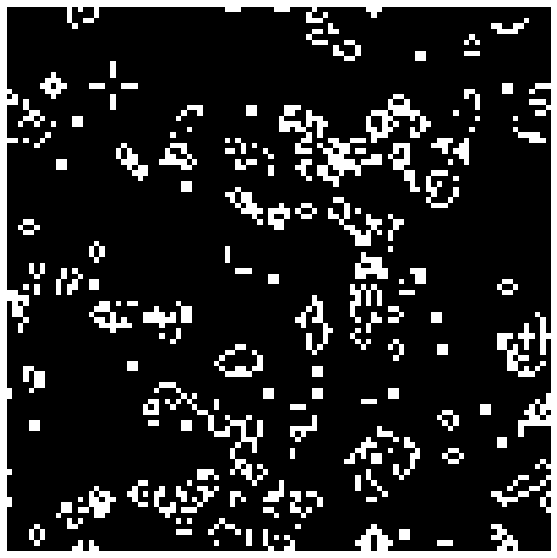

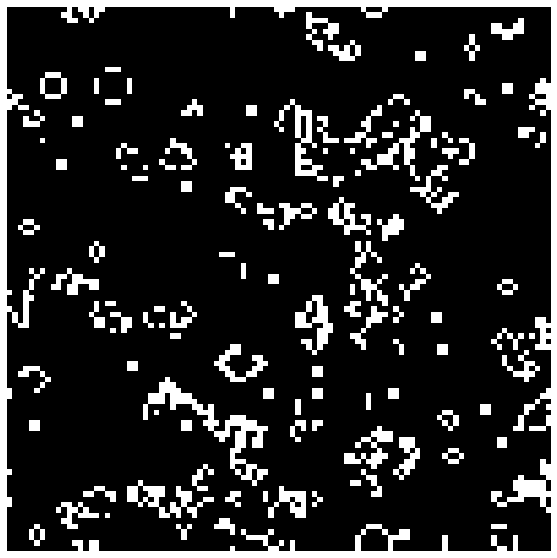

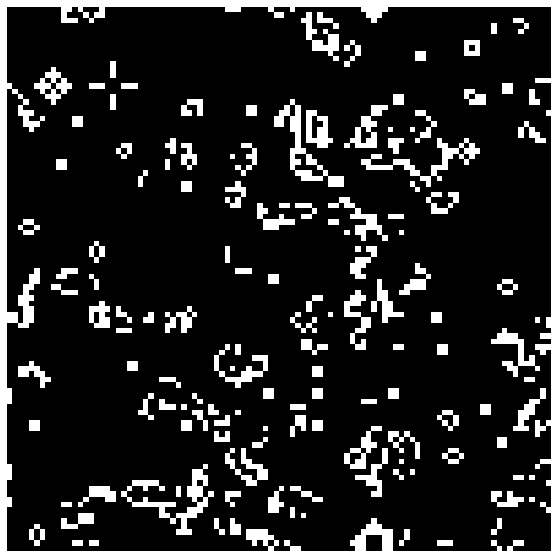

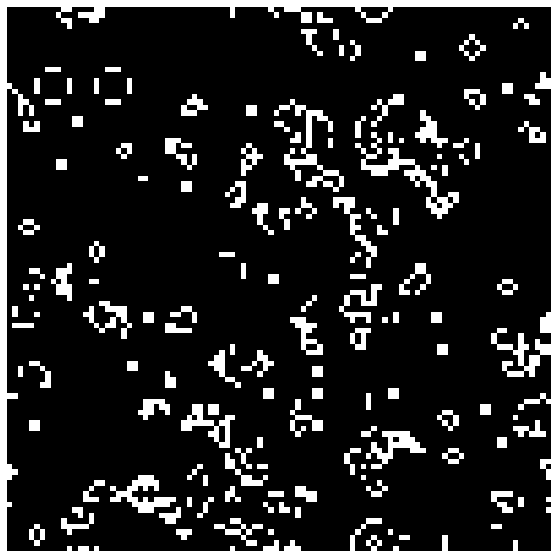

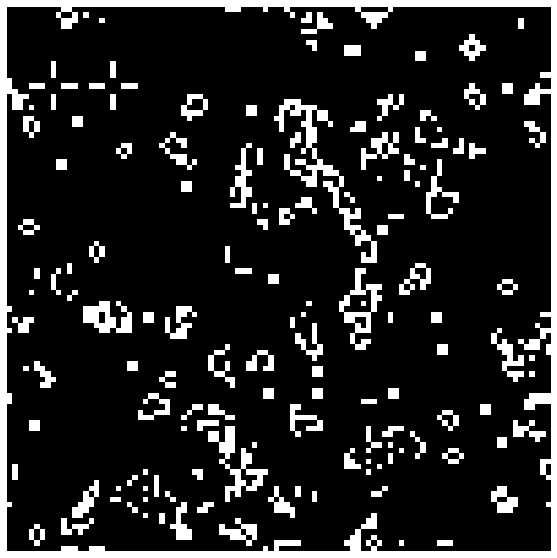

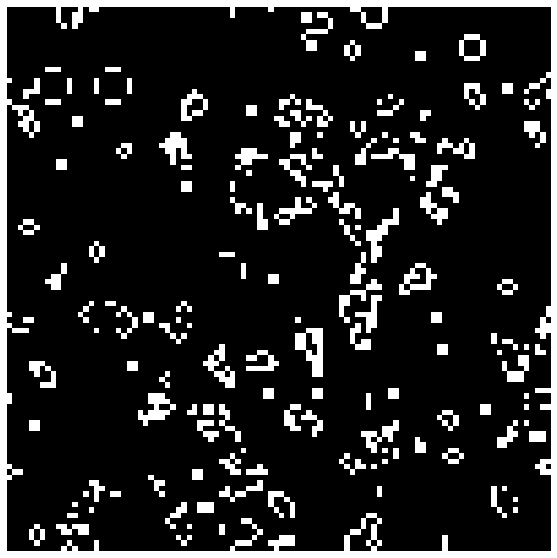

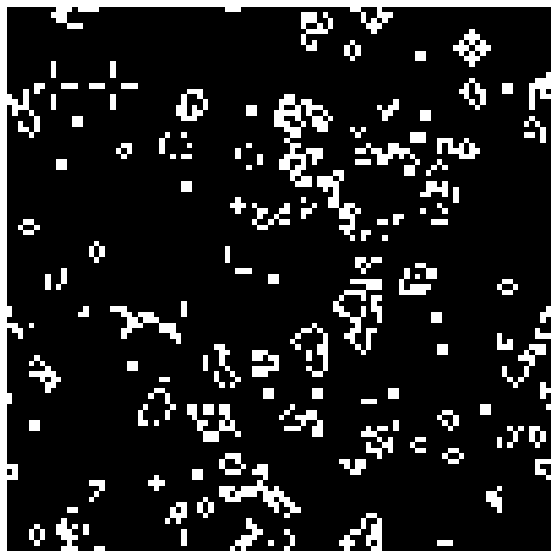

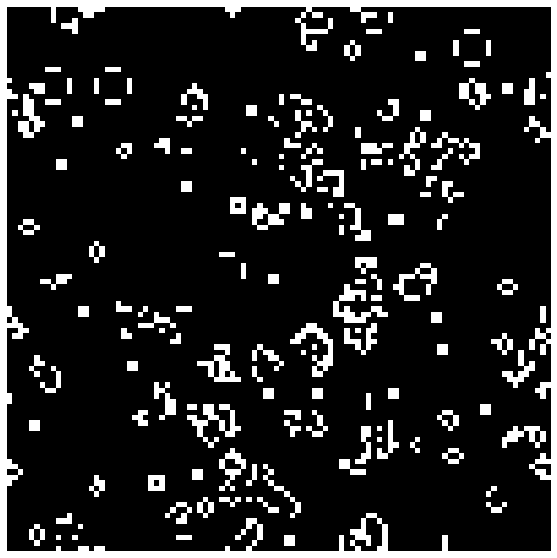

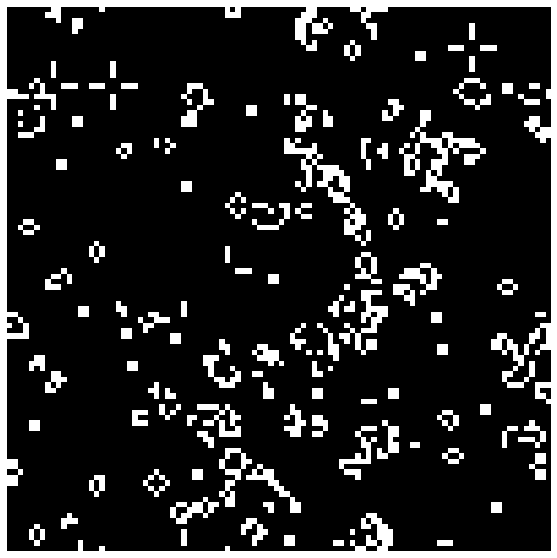

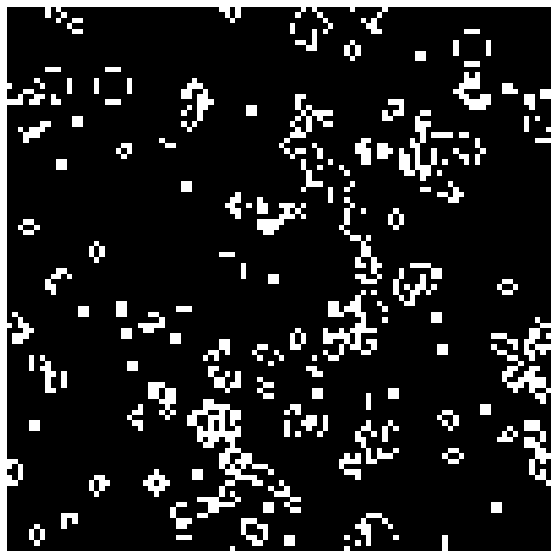

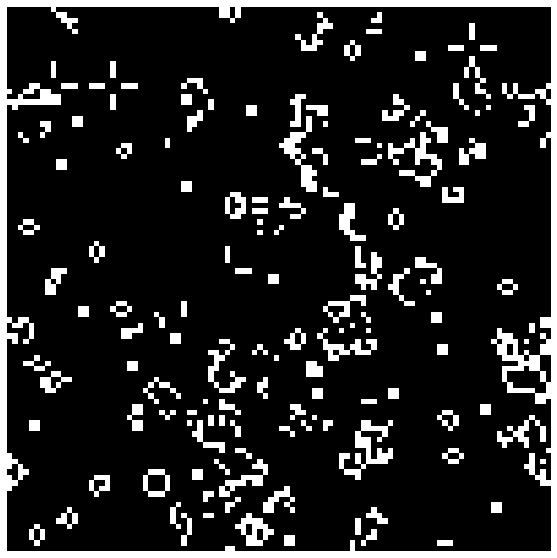

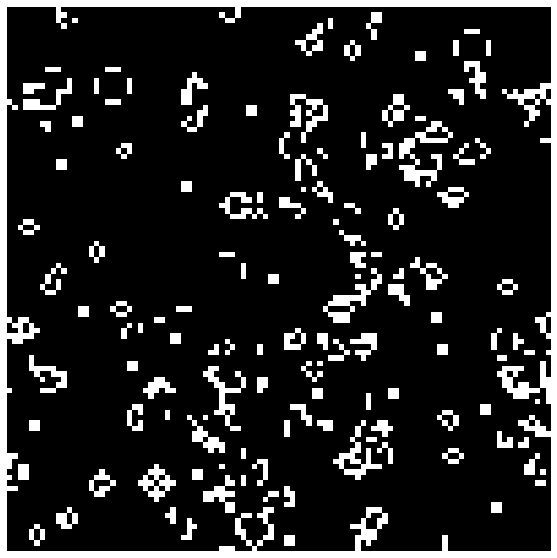

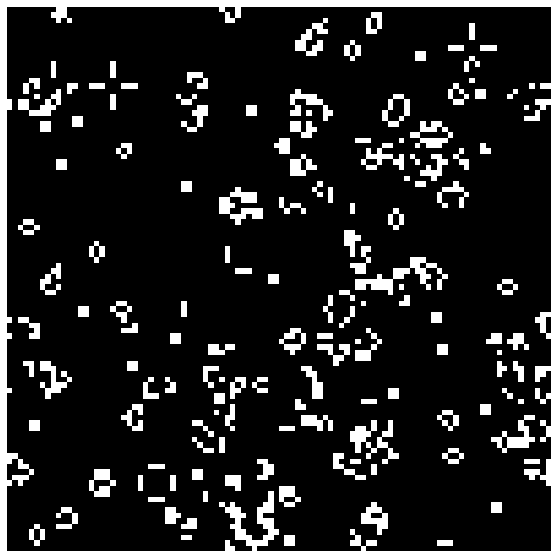

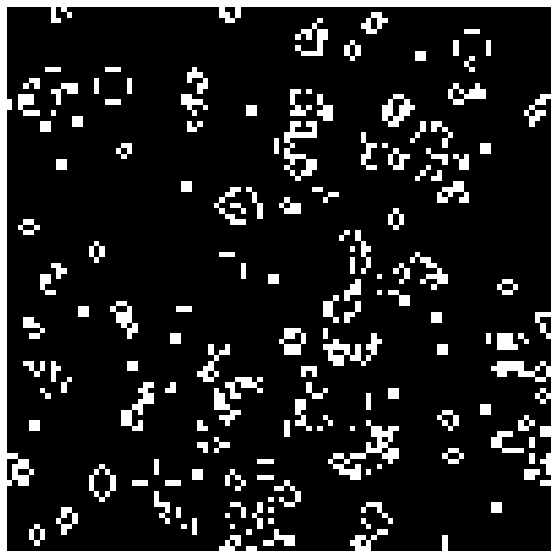

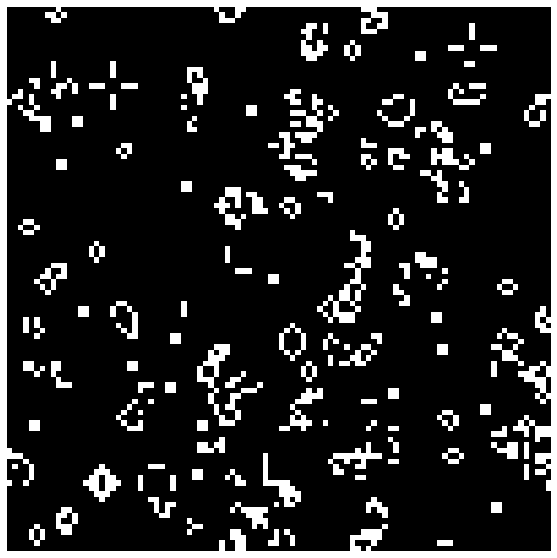

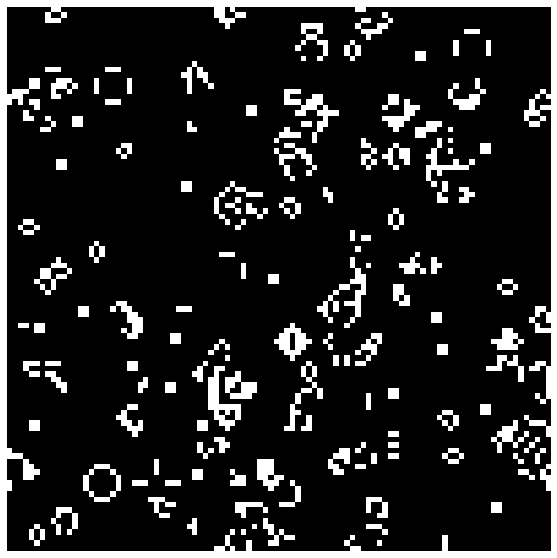

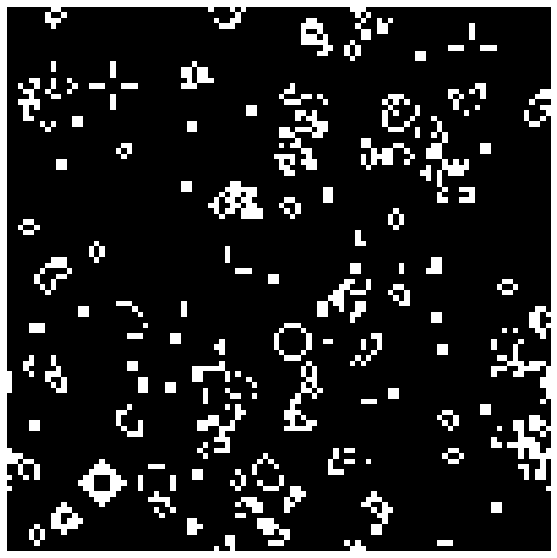

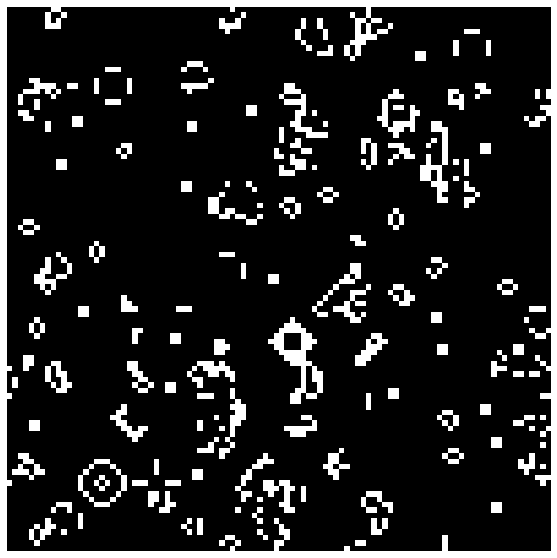

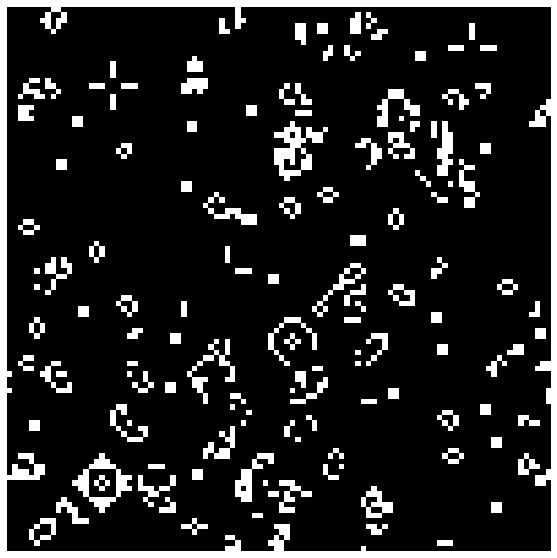

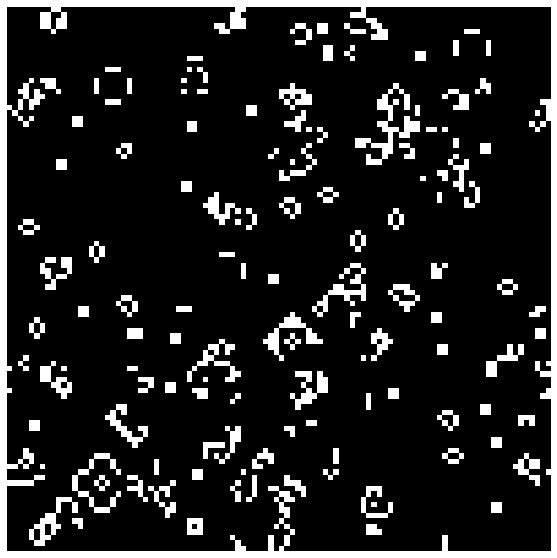

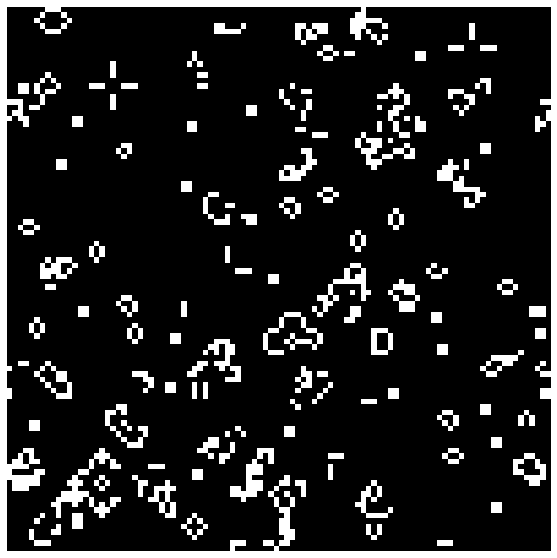

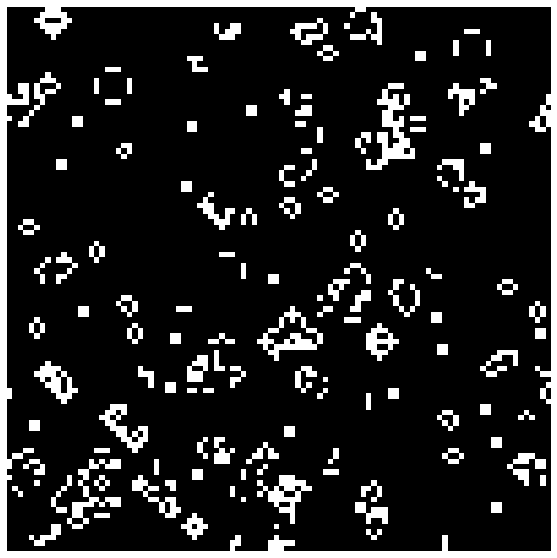

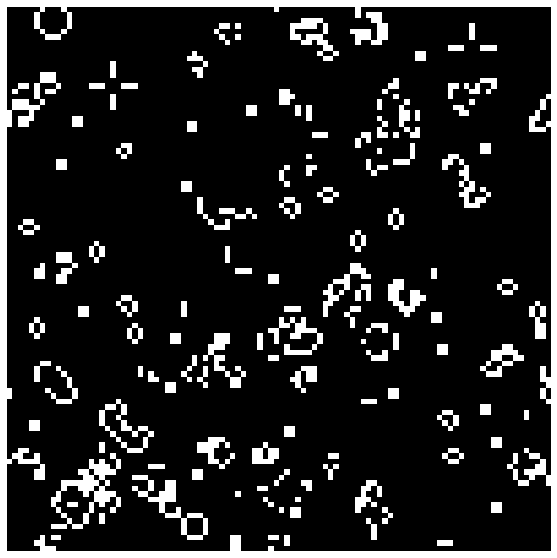

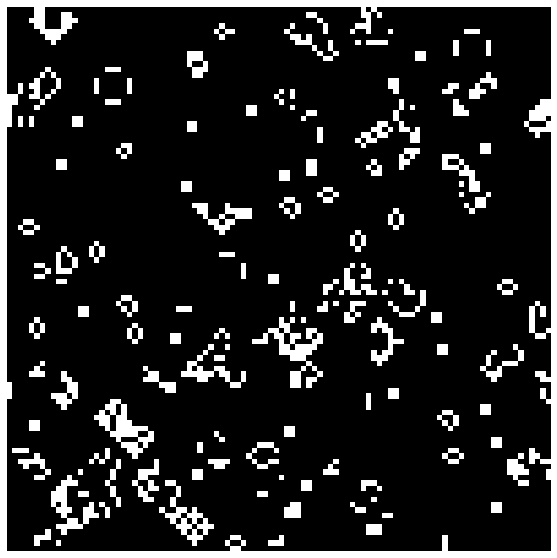

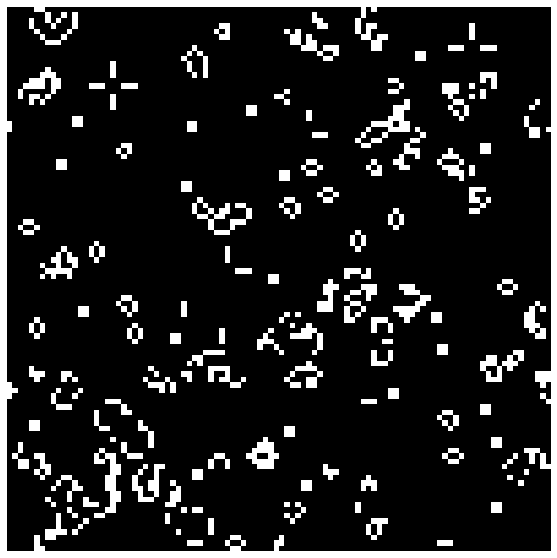

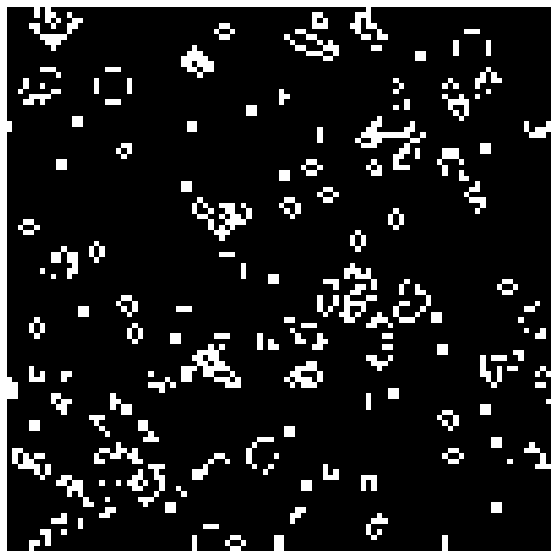

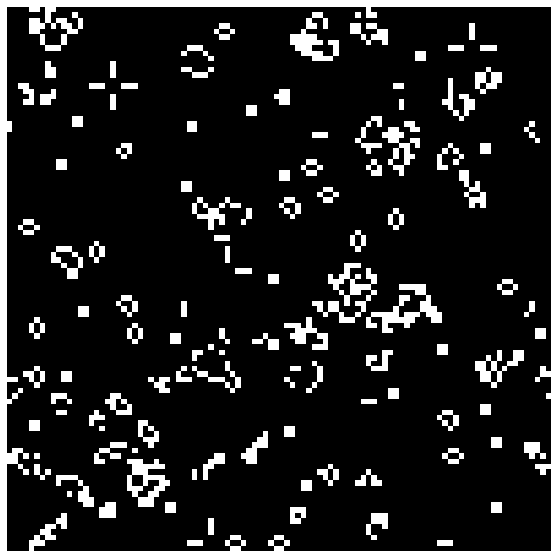

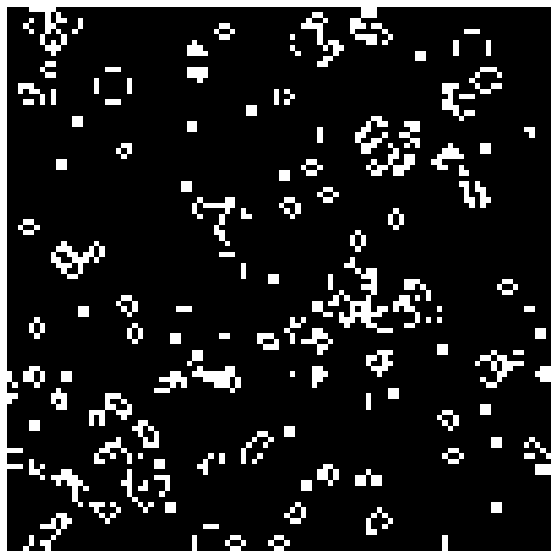

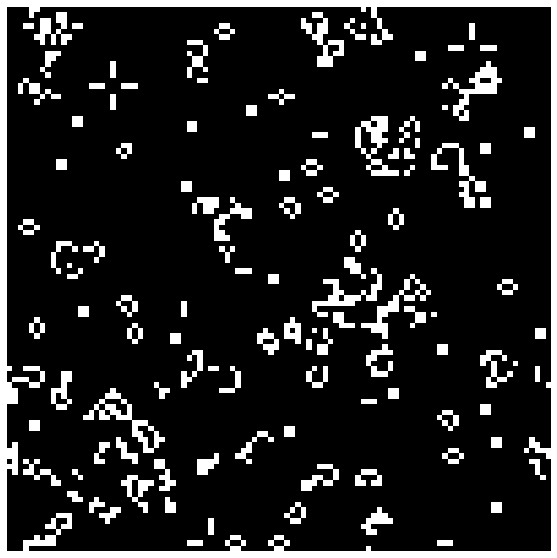

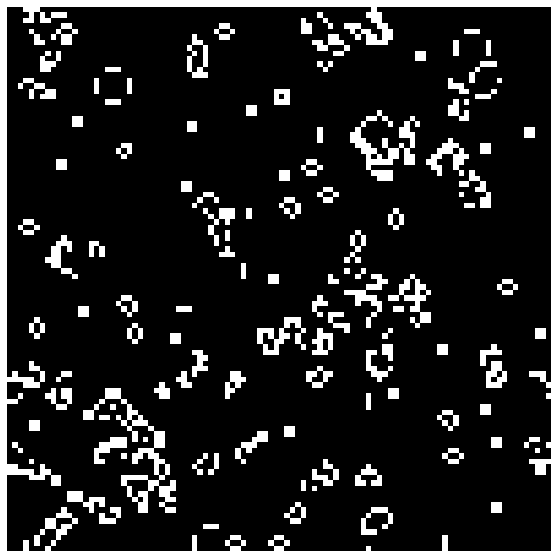

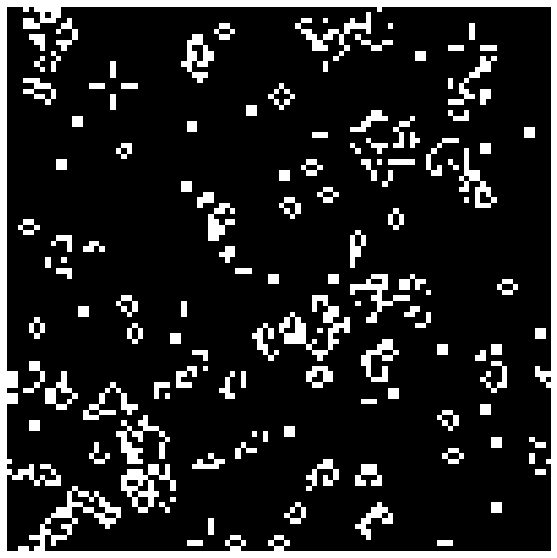

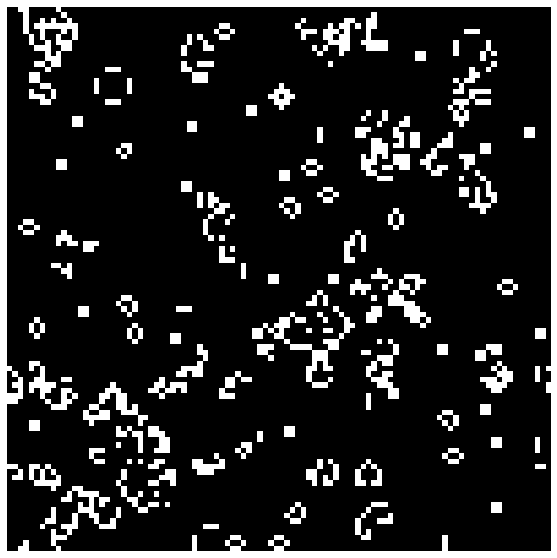

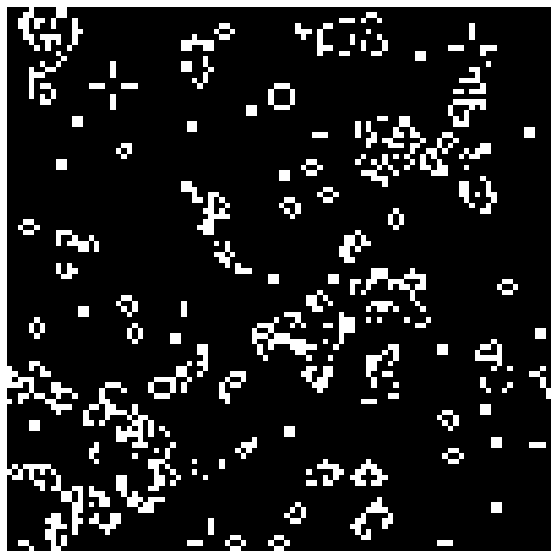

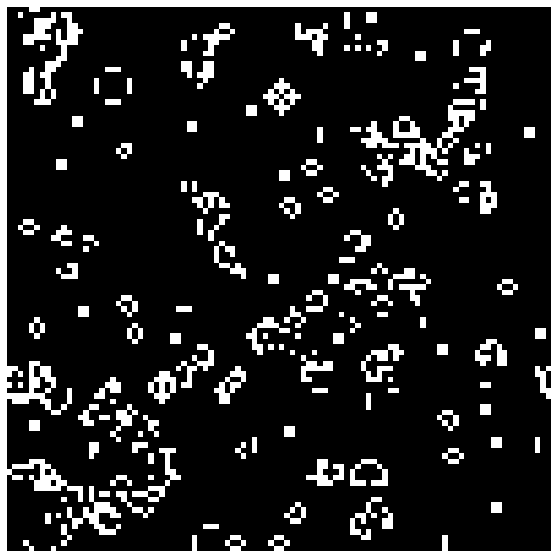

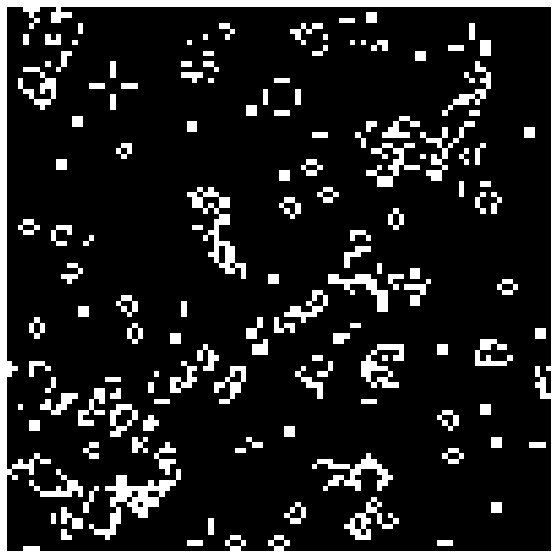

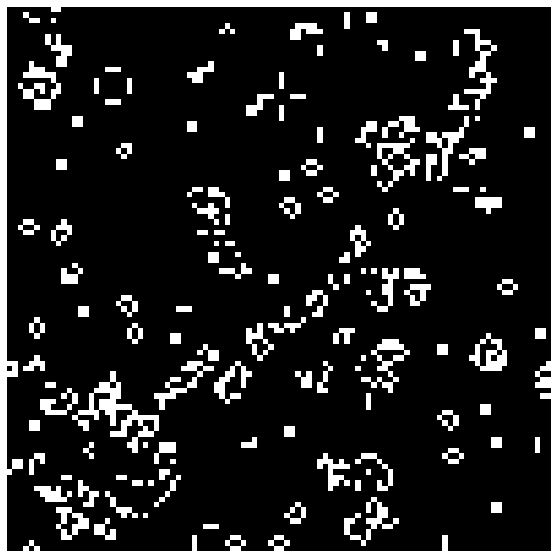

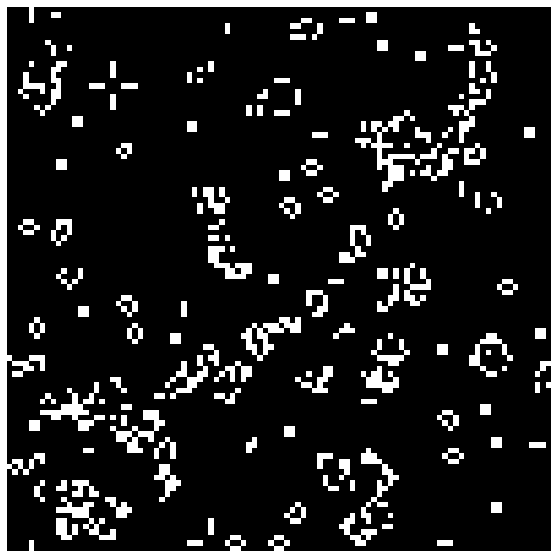

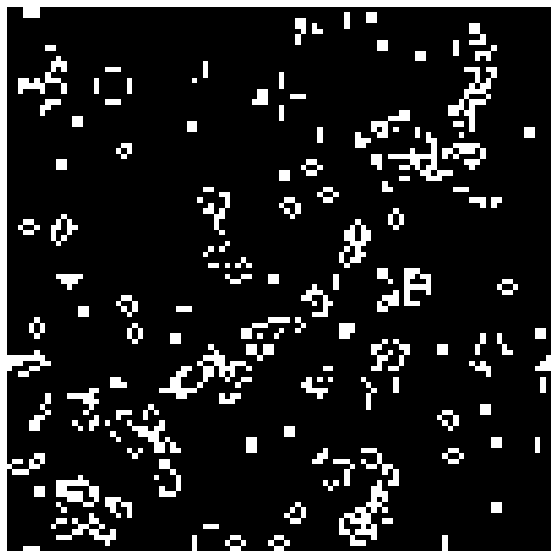

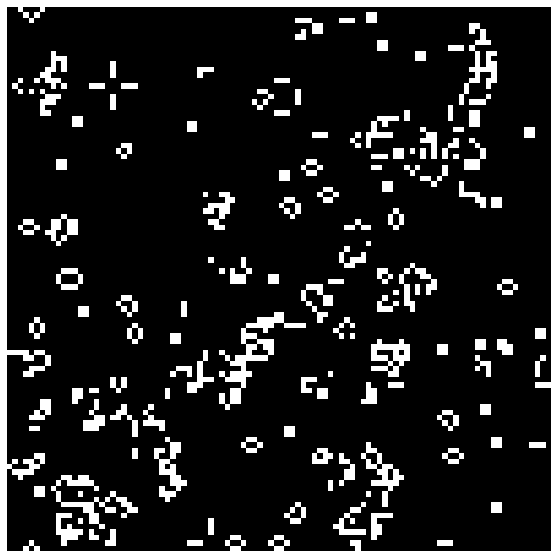

In [24]:
for i in range(100):

    plot(board)
    board = update(board, kernal)

In [25]:
#      Direction
#       |     | 
#   NW  |  N  | NE
#   ____|_____|____
#    W  |     | E
#   ____|_____|____
#   SW  |  S  | SE
#       |     |
# 
# 
#    Filter Index
#       |     | 
#   0,0 | 0,1 | 0,2
#   ____|_____|____
#   1,0 | 1,1 | 1,2
#   ____|_____|____
#   2,0 | 2,1 | 2,2
#       |     |
# 
# 
#    Roll Direction
#       |       | 
#  -1,1 | -1,0  | -1,-1
#   ____|_______|____
#   0,1 |  0,0  |  0,-1
#   ____|_______|____
#   1,1 |  1,0  |  1,-1
#       |       |

In [26]:
c1 = fft_convolve2d(board, kernal)

In [27]:
c1

array([[ 0.,  1.,  3., ..., -0., -0.,  0.],
       [ 0.,  1.,  3., ...,  0.,  0.,  0.],
       [ 0., -0.,  1., ..., -0., -0.,  0.],
       ...,
       [ 0., -0., -0., ..., -0., -0., -0.],
       [ 0., -0.,  1., ..., -0., -0.,  0.],
       [ 0.,  1.,  3., ...,  0.,  0., -0.]])

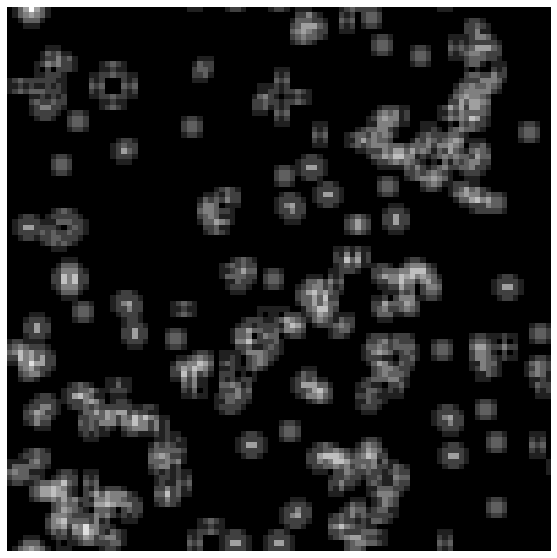

In [28]:
plot(c1)

In [29]:
neighborhood

array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [30]:
def roll_conv(M,f):
    
    L = f[1,1]*M
    L = L + f[1,2]*np.roll(M, (0,-1), (0,1)) # right neighbor E
    L = L + f[1,0]*np.roll(M, (0, 1), (0,1)) # left neighbor W
    L = L + f[0,1]*np.roll(M, (-1,0), (0,1)) # top neighbor N
    L = L + f[2,1]*np.roll(M, ( 1,0), (0,1)) # bottom neighbor S

    L = L + f[0,2]*np.roll(M, (-1,-1), (0,1)) #  NE
    L = L + f[0,0]*np.roll(M, (-1, 1), (0,1)) #  NW
    L = L + f[2,2]*np.roll(M, ( 1,-1), (0,1)) #  SE
    L = L + f[2,0]*np.roll(M, ( 1, 1), (0,1)) #  SW
    
    return L

In [31]:
c2 = roll_conv(board,neighborhood)

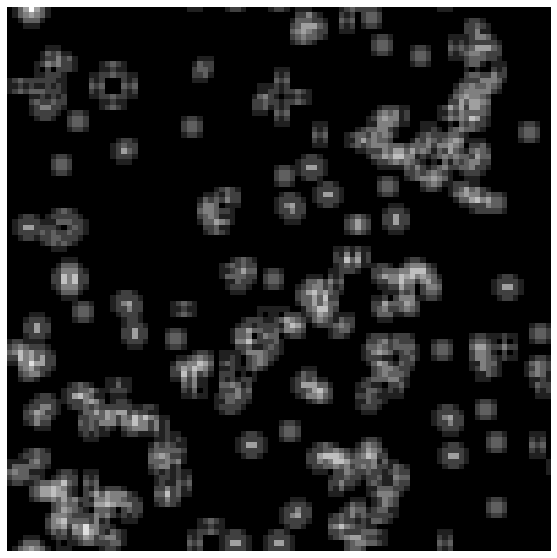

In [32]:
plot(c2)

In [33]:
c1 == c2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [34]:
%%timeit
fft_convolve2d(board, kernal)

1000 loops, best of 5: 771 µs per loop


In [35]:
%%timeit
c2 = roll_conv(board,neighborhood)

The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 283 µs per loop


In [36]:
# S/B notation
# The most common other format is {number list}/{number list}, called 
# "S/B notation", where the number lists are the numbers of neighbours that cause a live cell to survive and a dead cell to be born respectively. 
# In this format, Conway's Game of Life would have the rulestring [2,3]/[3].

In [37]:
def amoeba():
    return ([[1, 3, 5, 8], [3, 5, 7]],
                _moore_neighborhood())

def anneal():
    return ([[3, 5, 6, 7, 8], [4, 6, 7, 8]],
                _moore_neighborhood())

def assimilation():
    return ([[4, 5, 6, 7], [3, 4, 5]],
                _moore_neighborhood())

def coagulations():
    return ([[2, 3, 5, 6, 7, 8], [3, 7, 8]],
                _moore_neighborhood())

def conway():
    return ([[2, 3], [3]],
                _moore_neighborhood())

def coral():
    return ([[4, 5, 6, 7, 8], [3]],
                _moore_neighborhood())

def day_and_night():
    return ([[3, 4, 6, 7, 8], [3, 6, 7, 8]],
                _moore_neighborhood())

def diamoeba():
    return ([[5, 6, 7, 8], [3, 5, 6, 7, 8]],
                _moore_neighborhood())

def flakes():
    return ([[0, 1, 2, 3, 4, 5, 6, 7, 8], [3]],
                _moore_neighborhood())

def gnarl():
    return ([[1], [1]],
                _moore_neighborhood())

def high_life():
    return ([[2, 3], [3, 6]],
                _moore_neighborhood())

def inverse_life():
    return ([[3, 4, 6, 7, 8], [0, 1, 2, 3, 4, 7, 8]],
                _moore_neighborhood())

def life_34():
    return ([[1, 2, 5], [3, 6]],
                _moore_neighborhood())

def long_life():
    return ([[5], [3, 4, 5]],
                _moore_neighborhood())

def maze():
    return ([[1, 2, 3, 4, 5], [3]],
                _moore_neighborhood())

def move():
    return ([[2, 4, 5], [3, 6, 8]],
                _moore_neighborhood())

def pseudo_life():
    return ([[2, 3, 8], [3, 5, 7]],
                _moore_neighborhood())

def replicator():
    return ([[1, 3, 5, 7], [1, 3, 5, 7]],
                _moore_neighborhood())

def seeds():
    return ([[], [2,]],
                _moore_neighborhood())

def serviettes():
    return ([[], [2, 3, 4]],
                _moore_neighborhood())

def stains():
    return ([[2, 3, 5, 6, 7, 8], [3, 6, 7, 8]],
                _moore_neighborhood())

def two_by_two():
    return ([[1, 2, 5], [3, 6]],
                _moore_neighborhood())

def walled_cities():
    return ([[2, 3, 4, 5], [4, 5, 6, 7, 8]],
                _moore_neighborhood())

def bugs():
    return ([[[34, 58]], [[34, 45]]],
                _box_neighborhood(radius=5))

def bugs_movie():
    return ([[[123, 212]], [[123, 170]]],
                _box_neighborhood(radius=10))

def globe():
    return ([[[163, 223]], [[74, 252]]],
                _box_neighborhood(radius=8, center=False))

def majority():
    return ([[[41, 81]], [[41, 81]]],
                _box_neighborhood(radius=4))

def majorly():
    return ([[[113, 225]], [[113, 225]]],
                _box_neighborhood(radius=7))

def waffle():
    return ([[[100, 200]],[[75, 170]]],
                _box_neighborhood(radius=7))

def ltl59999():
    return ([[[9, 9]], [[9, 9]]],
                _box_neighborhood(radius=5))

def ltl534473460():
    return ([[[34, 60]], [[34, 47]]],
                _box_neighborhood(radius=5))

def ltl534413458():
    return ([[[34, 58]], [[34, 41]]],
                _box_neighborhood(radius=5))

def _moore_neighborhood():
    return [[1, 1, 1],
            [1, 0, 1],
            [1, 1, 1]]

def _box_neighborhood(radius, center=True):
    np.ones((radius*2+1, radius*2+1))
    if not center:
        neighborhood[radius][radius] = 0
    return neighborhood

In [46]:
# rules = day_and_night()
# rules = conway()
# rules = flakes()
rules = coral()
# rules = replicator()
# rules = maze()
# rules = waffle()
# rules = gnarl()
# rules = majorly()

board = np.random.uniform(0, 1, shape) < 0.5

In [47]:
rules

([[4, 5, 6, 7, 8], [3]], [[1, 1, 1], [1, 0, 1], [1, 1, 1]])

In [48]:
# board = board*0
# board[50:52,50:52] = 1
# plot(board)

In [49]:
rule = rules[0]
neighborhood = rules[1]

In [50]:
rule

[[4, 5, 6, 7, 8], [3]]

In [51]:
neighborhood

[[1, 1, 1], [1, 0, 1], [1, 1, 1]]

In [52]:
get_ints = lambda x: [i for i in x if isinstance(i, int)]
rule_ints = (get_ints(rule[0]), get_ints(rule[1]))
get_ranges = lambda x: [i for i in x if not isinstance(i, int)]
rule_ranges = (get_ranges(rule[0]), get_ranges(rule[1]))

In [53]:
neighborhood = np.array(neighborhood)
kernal = np.zeros(board.shape)
n_height, n_width = neighborhood.shape
b_height, b_width = board.shape
kernal[(b_height - n_height - 1) // 2 : (b_height + n_height) // 2, (b_width - n_width - 1) // 2 : (b_width + n_width) // 2] = neighborhood
kernal_ft = np.fft.fft2(kernal)
board_ft = np.fft.fft2(board)
height, width = board_ft.shape

for i in range(1000):

    plot(board)

    board_ft = np.fft.fft2(board)

    convolution = np.fft.ifft2(board_ft * kernal_ft)
    convolution = np.roll(convolution, - int(height / 2) + 1, axis=0)
    convolution = np.roll(convolution, - int(width / 2) + 1, axis=1)
    convolution = convolution.round()

    new_board = np.zeros(convolution.shape)

    new_board[np.where(np.in1d(convolution, rule_ints[0]).reshape(shape) & (board == 1))] = 1
    new_board[np.where(np.in1d(convolution, rule_ints[1]).reshape(shape) & (board == 0))] = 1

    for rule_range in rule_ranges[0]:
        new_board[np.where((board == 1) & (convolution >= rule_range[0]) & (convolution <= rule_range[1]))] = 1

    for rule_range in rule_ranges[1]:
        new_board[np.where((board == 0) & (convolution >= rule_range[0]) & (convolution <= rule_range[1]))] = 1

    board = new_board.astype(int)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
C = np.zeros((100,100))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

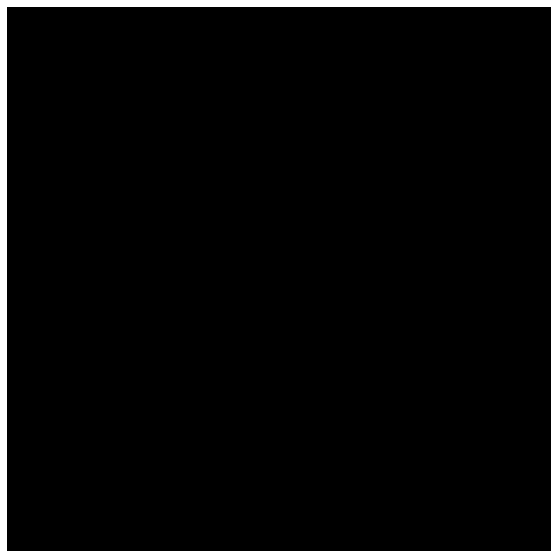

In [ ]:
plot(C)

In [ ]:
C[0,50] = 1 

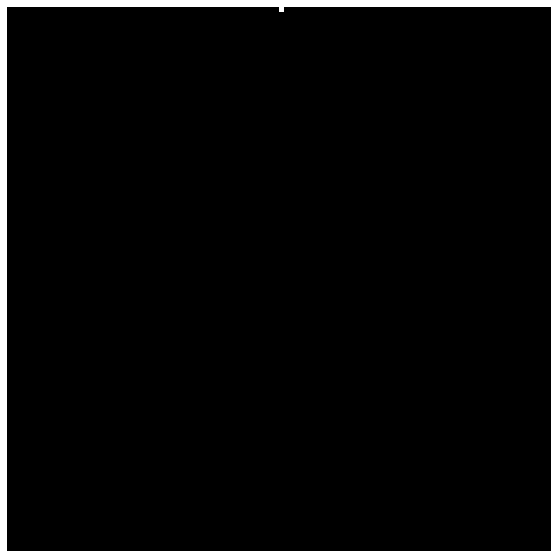

In [ ]:
plot(C)

In [ ]:
def CA(X):

    for i in range(1,X.shape[0]-1): #row
        for j in range(1,X.shape[1]-1): #col

            X[i,j] = int(rule/(2**(4*X[i-1,j-1] + 2*X[i-1,j] + X[i-1,j+1]))) % 2

    return X

In [ ]:
# =MOD(INT($A$1/(2^(Z2*4+AA2*2+AB2))),2)

In [ ]:
rule = 30

In [ ]:
CA(C)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

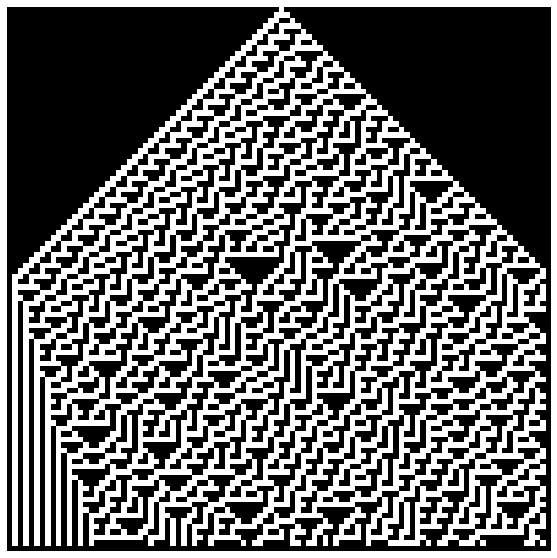

In [ ]:
plot(CA(C))

In [ ]:
rule = 110 #Rule 110 is Turing Complete https://en.wikipedia.org/wiki/Rule_110

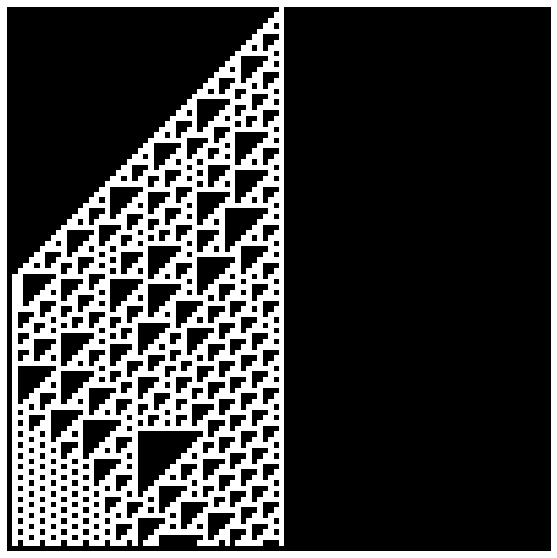

In [ ]:
plot(CA(C))

In [ ]:
C = np.zeros((100,100))

In [ ]:
C[0,:] = np.random.randint(0,2,(1,100))

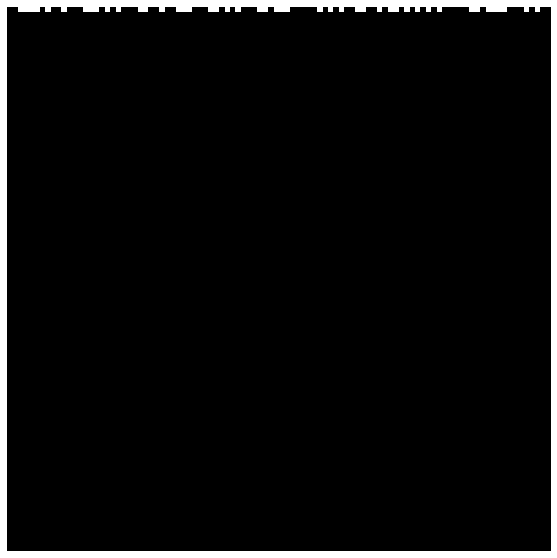

In [ ]:
plot(C)

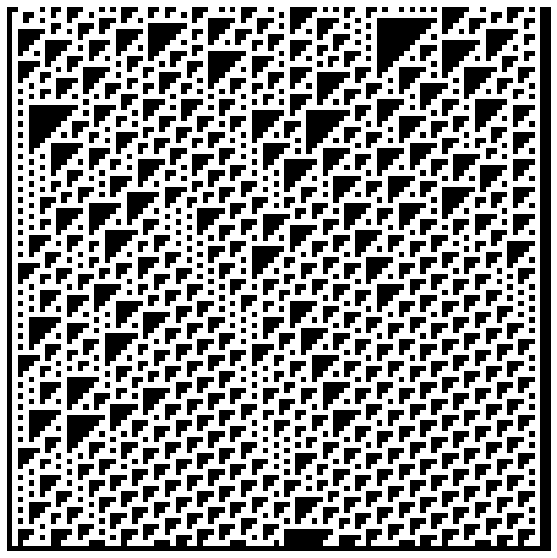

In [ ]:
plot(CA(C))